In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-ee-mZ5500GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-5500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-5500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-5500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-5500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-5500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-5500-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-5500-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-5500-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-5500-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-5500-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-5500-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-5500-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()





# 3rd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-5500-3.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-5500-3.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-5500-3.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-5500-3.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-5500-3.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-5500-3.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-3.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

412077
197848
432736


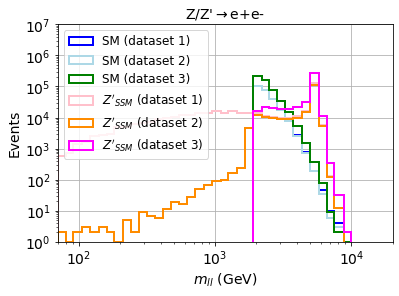

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/ee/"

invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 2)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 3)")


folder_saved = "Zprime-SSM-ee-mZ5500GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")
plt.hist(invariant_mass_eeSSMZprime_3, bins=bins_atlas, lw=2, edgecolor='magenta', histtype='step', label="$Z'_{SSM}$ (dataset 3)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/ee/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-pt.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-eta.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-phi.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-pt.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-eta.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-phi.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.47 or -1.52 < e1eta_eeSM[i] < -1.37 or 1.37 < e1eta_eeSM[i] < 1.52 or e1eta_eeSM[i] > 2.47 or e2eta_eeSM[i] < -2.47 or -1.52 < e2eta_eeSM[i] < -1.37 or 1.37 < e2eta_eeSM[i] < 1.52 or e2eta_eeSM[i] > 2.47:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800








# 3rd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800-2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800-2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800-2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800-2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800-2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800





# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.47
2.47
-2.47
2.47


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-ee-mZ5500GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-5500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-5500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-5500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-5500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-5500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-5500-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.47 or -1.52 < e1eta_eeSSMZprime[i] < -1.37 or 1.37 < e1eta_eeSSMZprime[i] < 1.52 or e1eta_eeSSMZprime[i] > 2.47 or e2eta_eeSSMZprime[i] < -2.47 or -1.52 < e2eta_eeSSMZprime[i] < -1.37 or 1.37 < e2eta_eeSSMZprime[i] < 1.52 or e2eta_eeSSMZprime[i] > 2.47:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)
        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-pt-5500-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-eta-5500-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-phi-5500-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-pt-5500-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-eta-5500-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-phi-5500-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_2[i] < 1.52 or e1eta_eeSSMZprime_2[i] > 2.47 or e2eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_2[i] < 1.52 or e2eta_eeSSMZprime_2[i] > 2.47:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2







        
# 3rd DATASET
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

e1pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-pt-5500-3.txt', delimiter=',')
e1eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-eta-5500-3.txt', delimiter=',')
e1phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-phi-5500-3.txt', delimiter=',')

e2pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-pt-5500-3.txt', delimiter=',')
e2eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-eta-5500-3.txt', delimiter=',')
e2phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-phi-5500-3.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_3))):
    if invariant_mass_eeSSMZprime_3[i]< 2000 or e1eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_3[i] < 1.52 or e1eta_eeSSMZprime_3[i] > 2.47 or e2eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_3[i] < 1.52 or e2eta_eeSSMZprime_3[i] > 2.47:
        e1pt_eeSSMZprime_3 = np.delete(e1pt_eeSSMZprime_3, i)
        e1eta_eeSSMZprime_3 = np.delete(e1eta_eeSSMZprime_3, i)
        e1phi_eeSSMZprime_3 = np.delete(e1phi_eeSSMZprime_3, i)
        
        e2pt_eeSSMZprime_3 = np.delete(e2pt_eeSSMZprime_3, i)
        e2eta_eeSSMZprime_3 = np.delete(e2eta_eeSSMZprime_3, i)
        e2phi_eeSSMZprime_3 = np.delete(e2phi_eeSSMZprime_3, i)
        
        invariant_mass_eeSSMZprime_3 = np.delete(invariant_mass_eeSSMZprime_3, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_3 = 1.*len(invariant_mass_eeSSMZprime_3) / eventos_parton
print(aceptancia_eeSSMZprime_3)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_3])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_3])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_3])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_3])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_3])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_3])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_3])



# remove the aux
del e1pt_eeSSMZprime_3
del e1eta_eeSSMZprime_3
del e1phi_eeSSMZprime_3

del e2pt_eeSSMZprime_3
del e2eta_eeSSMZprime_3
del e2phi_eeSSMZprime_3

del invariant_mass_eeSSMZprime_3






# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.376202
0.865408
(829956,)
(829956,)
(829956,)
(829956,)
(829956,)
(829956,)
(829956,)
(829956,)
(829956,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.469
2.469
-2.469
2.469


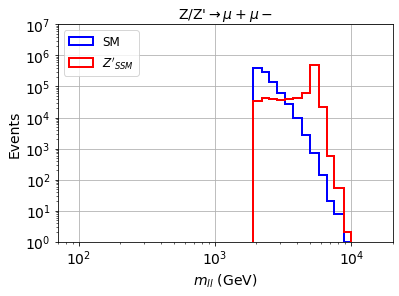

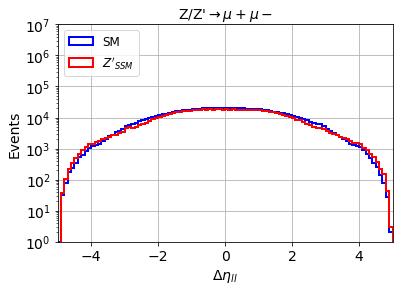

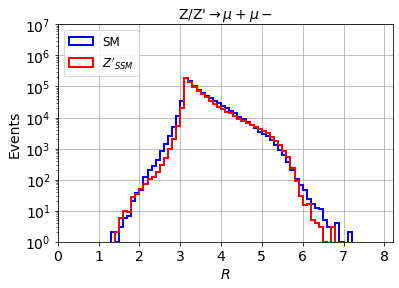

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.180054  0.458097  0.458625  0.202674  0.617409  0.964036  0.011491   
1        0.102366  0.242713  0.782623  0.129288  0.738462  0.299013  0.045644   
2        0.229840  0.516397  0.277371  0.253974  0.470648  0.789306  0.054810   
3        0.143699  0.424089  0.408498  0.169211  0.895951  0.924570  0.118419   
4        0.202395  0.415182  0.181254  0.220481  0.386235  0.636219  0.013065   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.364933  0.364575  0.829726  0.384882  0.749393  0.329408  0.458357   
1499996  0.234919  0.341296  0.001114  0.236445  0.722065  0.478199  0.197940   
1499997  0.549774  0.553239  0.565563  0.553665  0.707895  0.056174  0.488004   
1499998  0.371504  0.242713  0.243794  0.381126  0.650202  0.746022  0.492578   
1499999  0.507905  0.569636  0.535646  0.531714  0.496761  0.042330  0.407119   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63928	validation_1-logloss:0.63948
[1]	validation_0-logloss:0.59492	validation_1-logloss:0.59511
[2]	validation_0-logloss:0.55788	validation_1-logloss:0.55815
[3]	validation_0-logloss:0.52643	validation_1-logloss:0.52677
[4]	validation_0-logloss:0.49991	validation_1-logloss:0.50031
[5]	validation_0-logloss:0.47704	validation_1-logloss:0.47768
[6]	validation_0-logloss:0.45687	validation_1-logloss:0.45750
[7]	validation_0-logloss:0.43923	validation_1-logloss:0.43994
[8]	validation_0-logloss:0.42392	validation_1-logloss:0.42478
[9]	validation_0-logloss:0.41058	validation_1-logloss:0.41149
[10]	validation_0-logloss:0.39893	validation_1-logloss:0.40000
[11]	validation_0-logloss:0.38874	validation_1-logloss:0.38988
[12]	validation_0-logloss:0.37977	validation_1-logloss:0.38096
[13]	validation_0-logloss:0.37176	validation_1-logloss:0.37302
[14]	validation_0-logloss:0.36509	validation_1-logloss:0.36643
[15]	validation_0-logloss:0.35867	validation_1-logloss:0.36010
[1

[130]	validation_0-logloss:0.28344	validation_1-logloss:0.28747
[131]	validation_0-logloss:0.28338	validation_1-logloss:0.28744
[132]	validation_0-logloss:0.28337	validation_1-logloss:0.28743
[133]	validation_0-logloss:0.28334	validation_1-logloss:0.28742
[134]	validation_0-logloss:0.28331	validation_1-logloss:0.28741
[135]	validation_0-logloss:0.28329	validation_1-logloss:0.28741
[136]	validation_0-logloss:0.28328	validation_1-logloss:0.28741
[137]	validation_0-logloss:0.28326	validation_1-logloss:0.28740
[138]	validation_0-logloss:0.28323	validation_1-logloss:0.28738
[139]	validation_0-logloss:0.28318	validation_1-logloss:0.28736
[140]	validation_0-logloss:0.28316	validation_1-logloss:0.28735
[141]	validation_0-logloss:0.28313	validation_1-logloss:0.28734
[142]	validation_0-logloss:0.28312	validation_1-logloss:0.28734
[143]	validation_0-logloss:0.28309	validation_1-logloss:0.28734
[144]	validation_0-logloss:0.28306	validation_1-logloss:0.28732
[145]	validation_0-logloss:0.28304	valid

[259]	validation_0-logloss:0.28104	validation_1-logloss:0.28707
[260]	validation_0-logloss:0.28102	validation_1-logloss:0.28707
[261]	validation_0-logloss:0.28098	validation_1-logloss:0.28706
[262]	validation_0-logloss:0.28095	validation_1-logloss:0.28706
[263]	validation_0-logloss:0.28094	validation_1-logloss:0.28706
[264]	validation_0-logloss:0.28093	validation_1-logloss:0.28707
[265]	validation_0-logloss:0.28091	validation_1-logloss:0.28706
[266]	validation_0-logloss:0.28091	validation_1-logloss:0.28706
[267]	validation_0-logloss:0.28088	validation_1-logloss:0.28705
[268]	validation_0-logloss:0.28087	validation_1-logloss:0.28705
[269]	validation_0-logloss:0.28086	validation_1-logloss:0.28706
[270]	validation_0-logloss:0.28084	validation_1-logloss:0.28706
[271]	validation_0-logloss:0.28084	validation_1-logloss:0.28706
[272]	validation_0-logloss:0.28081	validation_1-logloss:0.28706
[273]	validation_0-logloss:0.28080	validation_1-logloss:0.28707
[274]	validation_0-logloss:0.28079	valid

[388]	validation_0-logloss:0.27916	validation_1-logloss:0.28707
[389]	validation_0-logloss:0.27915	validation_1-logloss:0.28708
[390]	validation_0-logloss:0.27913	validation_1-logloss:0.28708


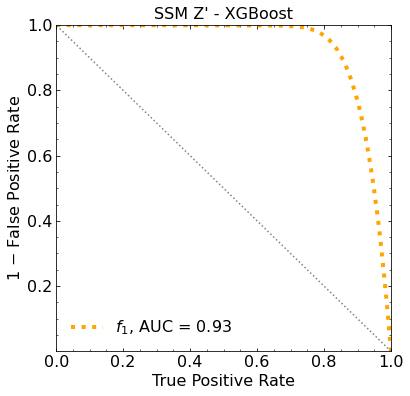

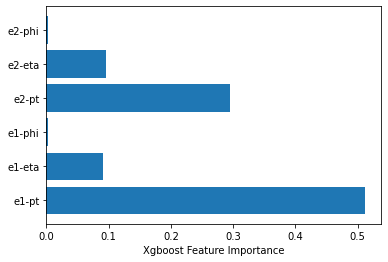

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63953	validation_1-logloss:0.63954
[1]	validation_0-logloss:0.59502	validation_1-logloss:0.59518
[2]	validation_0-logloss:0.55792	validation_1-logloss:0.55826
[3]	validation_0-logloss:0.52623	validation_1-logloss:0.52675
[4]	validation_0-logloss:0.49914	validation_1-logloss:0.49980
[5]	validation_0-logloss:0.47582	validation_1-logloss:0.47669
[6]	validation_0-logloss:0.45585	validation_1-logloss:0.45685
[7]	validation_0-logloss:0.43855	validation_1-logloss:0.43951
[8]	validation_0-logloss:0.42338	validation_1-logloss:0.42453
[9]	validation_0-logloss:0.41021	validation_1-logloss:0.41145
[10]	validation_0-logloss:0.39863	validation_1-logloss:0.39983
[11]	validation_0-logloss:0.38846	validation_1-logloss:0.38983
[12]	validation_0-logloss:0.37979	validation_1-logloss:0.38118
[13]	validation_0-logloss:0.37196	validation_1-logloss:0.37344
[14]	validation_0-logloss:0.36484	validation_1-logloss:0.36638
[15]	validation_0-logloss:0.35839	validation_1-logloss:0.36002
[1

[130]	validation_0-logloss:0.28202	validation_1-logloss:0.28797
[131]	validation_0-logloss:0.28196	validation_1-logloss:0.28796
[132]	validation_0-logloss:0.28192	validation_1-logloss:0.28795
[133]	validation_0-logloss:0.28187	validation_1-logloss:0.28795
[134]	validation_0-logloss:0.28183	validation_1-logloss:0.28793
[135]	validation_0-logloss:0.28175	validation_1-logloss:0.28791
[136]	validation_0-logloss:0.28170	validation_1-logloss:0.28789
[137]	validation_0-logloss:0.28164	validation_1-logloss:0.28789
[138]	validation_0-logloss:0.28161	validation_1-logloss:0.28787
[139]	validation_0-logloss:0.28157	validation_1-logloss:0.28787
[140]	validation_0-logloss:0.28153	validation_1-logloss:0.28786
[141]	validation_0-logloss:0.28150	validation_1-logloss:0.28787
[142]	validation_0-logloss:0.28147	validation_1-logloss:0.28786
[143]	validation_0-logloss:0.28143	validation_1-logloss:0.28786
[144]	validation_0-logloss:0.28140	validation_1-logloss:0.28786
[145]	validation_0-logloss:0.28137	valid

[259]	validation_0-logloss:0.27800	validation_1-logloss:0.28784
[260]	validation_0-logloss:0.27795	validation_1-logloss:0.28784


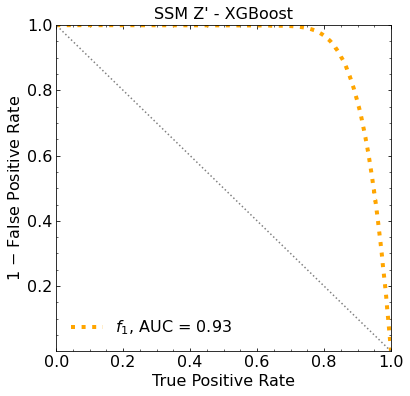


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63892	validation_1-logloss:0.63904
[1]	validation_0-logloss:0.59457	validation_1-logloss:0.59485
[2]	validation_0-logloss:0.55749	validation_1-logloss:0.55805
[3]	validation_0-logloss:0.52603	validation_1-logloss:0.52670
[4]	validation_0-logloss:0.49942	validation_1-logloss:0.50006
[5]	validation_0-logloss:0.47619	validation_1-logloss:0.47714
[6]	validation_0-logloss:0.45584	validation_1-logloss:0.45691
[7]	validation_0-logloss:0.43799	validation_1-logloss:0.43920
[8]	validation_0-logloss:0.42301	validation_1-logloss:0.42431
[9]	validation_0-logloss:0.40973	validation_1-logloss:0.41115
[10]	validation_0-logloss:0.39833	validation_1-logloss:0.39983
[11]	validation_0-logloss:0.38807	validation_1-logloss:0.38961
[12]	validation_0-logloss:0.37891	validation_1-logloss:0.38056
[13]	validation_0-logloss:0.37084	validation_1-logloss:0.37258
[14]	validation_0-logloss:0.36392	validation_1-logloss:0.36570
[15]	validation_0-logloss:0.35727	validation_1-logloss:0.35921
[1

[130]	validation_0-logloss:0.28135	validation_1-logloss:0.28810
[131]	validation_0-logloss:0.28130	validation_1-logloss:0.28810
[132]	validation_0-logloss:0.28128	validation_1-logloss:0.28809
[133]	validation_0-logloss:0.28125	validation_1-logloss:0.28809
[134]	validation_0-logloss:0.28119	validation_1-logloss:0.28807
[135]	validation_0-logloss:0.28116	validation_1-logloss:0.28807
[136]	validation_0-logloss:0.28109	validation_1-logloss:0.28804
[137]	validation_0-logloss:0.28105	validation_1-logloss:0.28804
[138]	validation_0-logloss:0.28099	validation_1-logloss:0.28801
[139]	validation_0-logloss:0.28096	validation_1-logloss:0.28800
[140]	validation_0-logloss:0.28091	validation_1-logloss:0.28800
[141]	validation_0-logloss:0.28086	validation_1-logloss:0.28800
[142]	validation_0-logloss:0.28084	validation_1-logloss:0.28800
[143]	validation_0-logloss:0.28081	validation_1-logloss:0.28800
[144]	validation_0-logloss:0.28078	validation_1-logloss:0.28800
[145]	validation_0-logloss:0.28075	valid

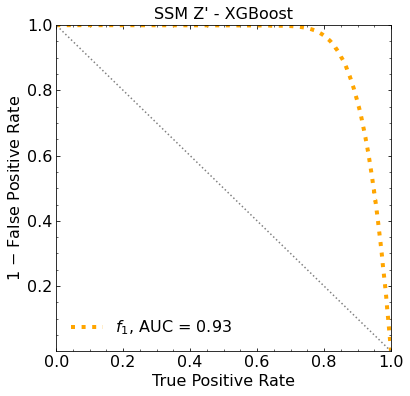


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63912	validation_1-logloss:0.63935
[1]	validation_0-logloss:0.59439	validation_1-logloss:0.59477
[2]	validation_0-logloss:0.55746	validation_1-logloss:0.55789
[3]	validation_0-logloss:0.52628	validation_1-logloss:0.52696
[4]	validation_0-logloss:0.49956	validation_1-logloss:0.50029
[5]	validation_0-logloss:0.47666	validation_1-logloss:0.47763
[6]	validation_0-logloss:0.45668	validation_1-logloss:0.45779
[7]	validation_0-logloss:0.43909	validation_1-logloss:0.44029
[8]	validation_0-logloss:0.42363	validation_1-logloss:0.42502
[9]	validation_0-logloss:0.40990	validation_1-logloss:0.41144
[10]	validation_0-logloss:0.39826	validation_1-logloss:0.39997
[11]	validation_0-logloss:0.38799	validation_1-logloss:0.38981
[12]	validation_0-logloss:0.37918	validation_1-logloss:0.38111
[13]	validation_0-logloss:0.37096	validation_1-logloss:0.37306
[14]	validation_0-logloss:0.36358	validation_1-logloss:0.36577
[15]	validation_0-logloss:0.35689	validation_1-logloss:0.35921
[1

[130]	validation_0-logloss:0.28048	validation_1-logloss:0.28792
[131]	validation_0-logloss:0.28045	validation_1-logloss:0.28792
[132]	validation_0-logloss:0.28043	validation_1-logloss:0.28792
[133]	validation_0-logloss:0.28039	validation_1-logloss:0.28792
[134]	validation_0-logloss:0.28035	validation_1-logloss:0.28791
[135]	validation_0-logloss:0.28030	validation_1-logloss:0.28790
[136]	validation_0-logloss:0.28026	validation_1-logloss:0.28790
[137]	validation_0-logloss:0.28024	validation_1-logloss:0.28789
[138]	validation_0-logloss:0.28020	validation_1-logloss:0.28789
[139]	validation_0-logloss:0.28017	validation_1-logloss:0.28789
[140]	validation_0-logloss:0.28015	validation_1-logloss:0.28789
[141]	validation_0-logloss:0.28012	validation_1-logloss:0.28788
[142]	validation_0-logloss:0.28010	validation_1-logloss:0.28788
[143]	validation_0-logloss:0.28004	validation_1-logloss:0.28786
[144]	validation_0-logloss:0.28001	validation_1-logloss:0.28786
[145]	validation_0-logloss:0.27998	valid

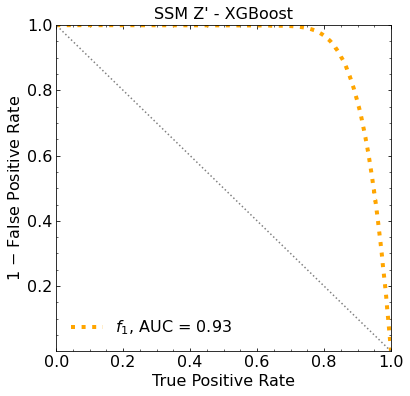


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63901	validation_1-logloss:0.63925
[1]	validation_0-logloss:0.59476	validation_1-logloss:0.59514
[2]	validation_0-logloss:0.55738	validation_1-logloss:0.55792
[3]	validation_0-logloss:0.52599	validation_1-logloss:0.52663
[4]	validation_0-logloss:0.49934	validation_1-logloss:0.50025
[5]	validation_0-logloss:0.47643	validation_1-logloss:0.47746
[6]	validation_0-logloss:0.45618	validation_1-logloss:0.45731
[7]	validation_0-logloss:0.43829	validation_1-logloss:0.43949
[8]	validation_0-logloss:0.42295	validation_1-logloss:0.42436
[9]	validation_0-logloss:0.40954	validation_1-logloss:0.41104
[10]	validation_0-logloss:0.39786	validation_1-logloss:0.39946
[11]	validation_0-logloss:0.38777	validation_1-logloss:0.38949
[12]	validation_0-logloss:0.37899	validation_1-logloss:0.38077
[13]	validation_0-logloss:0.37095	validation_1-logloss:0.37287
[14]	validation_0-logloss:0.36383	validation_1-logloss:0.36577
[15]	validation_0-logloss:0.35782	validation_1-logloss:0.35987
[1

[130]	validation_0-logloss:0.28124	validation_1-logloss:0.28791
[131]	validation_0-logloss:0.28121	validation_1-logloss:0.28792
[132]	validation_0-logloss:0.28115	validation_1-logloss:0.28791
[133]	validation_0-logloss:0.28113	validation_1-logloss:0.28791
[134]	validation_0-logloss:0.28109	validation_1-logloss:0.28789
[135]	validation_0-logloss:0.28103	validation_1-logloss:0.28788
[136]	validation_0-logloss:0.28099	validation_1-logloss:0.28788
[137]	validation_0-logloss:0.28095	validation_1-logloss:0.28787
[138]	validation_0-logloss:0.28093	validation_1-logloss:0.28787
[139]	validation_0-logloss:0.28090	validation_1-logloss:0.28786
[140]	validation_0-logloss:0.28087	validation_1-logloss:0.28786
[141]	validation_0-logloss:0.28085	validation_1-logloss:0.28786
[142]	validation_0-logloss:0.28082	validation_1-logloss:0.28786
[143]	validation_0-logloss:0.28080	validation_1-logloss:0.28786
[144]	validation_0-logloss:0.28077	validation_1-logloss:0.28787
[145]	validation_0-logloss:0.28072	valid

[259]	validation_0-logloss:0.27707	validation_1-logloss:0.28780
[260]	validation_0-logloss:0.27706	validation_1-logloss:0.28780
[261]	validation_0-logloss:0.27703	validation_1-logloss:0.28781
[262]	validation_0-logloss:0.27701	validation_1-logloss:0.28781
[263]	validation_0-logloss:0.27697	validation_1-logloss:0.28781
[264]	validation_0-logloss:0.27694	validation_1-logloss:0.28782
[265]	validation_0-logloss:0.27692	validation_1-logloss:0.28781
[266]	validation_0-logloss:0.27689	validation_1-logloss:0.28781
[267]	validation_0-logloss:0.27687	validation_1-logloss:0.28781
[268]	validation_0-logloss:0.27684	validation_1-logloss:0.28782
[269]	validation_0-logloss:0.27681	validation_1-logloss:0.28782
[270]	validation_0-logloss:0.27675	validation_1-logloss:0.28782
[271]	validation_0-logloss:0.27673	validation_1-logloss:0.28782


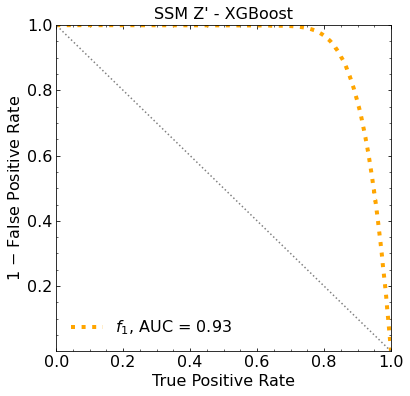


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63875	validation_1-logloss:0.63914
[1]	validation_0-logloss:0.59424	validation_1-logloss:0.59462
[2]	validation_0-logloss:0.55728	validation_1-logloss:0.55773
[3]	validation_0-logloss:0.52581	validation_1-logloss:0.52646
[4]	validation_0-logloss:0.49943	validation_1-logloss:0.50009
[5]	validation_0-logloss:0.47648	validation_1-logloss:0.47747
[6]	validation_0-logloss:0.45615	validation_1-logloss:0.45726
[7]	validation_0-logloss:0.43817	validation_1-logloss:0.43949
[8]	validation_0-logloss:0.42303	validation_1-logloss:0.42455
[9]	validation_0-logloss:0.40953	validation_1-logloss:0.41127
[10]	validation_0-logloss:0.39804	validation_1-logloss:0.39986
[11]	validation_0-logloss:0.38795	validation_1-logloss:0.38986
[12]	validation_0-logloss:0.37882	validation_1-logloss:0.38084
[13]	validation_0-logloss:0.37097	validation_1-logloss:0.37317
[14]	validation_0-logloss:0.36391	validation_1-logloss:0.36615
[15]	validation_0-logloss:0.35735	validation_1-logloss:0.35973
[1

[130]	validation_0-logloss:0.28085	validation_1-logloss:0.28797
[131]	validation_0-logloss:0.28081	validation_1-logloss:0.28796
[132]	validation_0-logloss:0.28079	validation_1-logloss:0.28796
[133]	validation_0-logloss:0.28070	validation_1-logloss:0.28792
[134]	validation_0-logloss:0.28068	validation_1-logloss:0.28791
[135]	validation_0-logloss:0.28064	validation_1-logloss:0.28792
[136]	validation_0-logloss:0.28060	validation_1-logloss:0.28792
[137]	validation_0-logloss:0.28058	validation_1-logloss:0.28792
[138]	validation_0-logloss:0.28053	validation_1-logloss:0.28790
[139]	validation_0-logloss:0.28048	validation_1-logloss:0.28789
[140]	validation_0-logloss:0.28045	validation_1-logloss:0.28788
[141]	validation_0-logloss:0.28042	validation_1-logloss:0.28788
[142]	validation_0-logloss:0.28036	validation_1-logloss:0.28784
[143]	validation_0-logloss:0.28031	validation_1-logloss:0.28783
[144]	validation_0-logloss:0.28027	validation_1-logloss:0.28783
[145]	validation_0-logloss:0.28024	valid

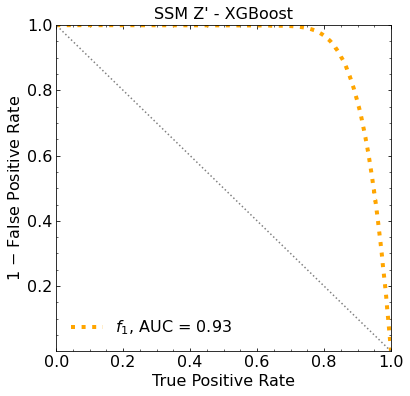


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63892	validation_1-logloss:0.63927
[1]	validation_0-logloss:0.59424	validation_1-logloss:0.59480
[2]	validation_0-logloss:0.55694	validation_1-logloss:0.55760
[3]	validation_0-logloss:0.52532	validation_1-logloss:0.52621
[4]	validation_0-logloss:0.49836	validation_1-logloss:0.49945
[5]	validation_0-logloss:0.47528	validation_1-logloss:0.47658
[6]	validation_0-logloss:0.45529	validation_1-logloss:0.45671
[7]	validation_0-logloss:0.43807	validation_1-logloss:0.43962
[8]	validation_0-logloss:0.42276	validation_1-logloss:0.42449
[9]	validation_0-logloss:0.40968	validation_1-logloss:0.41152
[10]	validation_0-logloss:0.39814	validation_1-logloss:0.40011
[11]	validation_0-logloss:0.38819	validation_1-logloss:0.39023
[12]	validation_0-logloss:0.37889	validation_1-logloss:0.38109
[13]	validation_0-logloss:0.37078	validation_1-logloss:0.37309
[14]	validation_0-logloss:0.36370	validation_1-logloss:0.36611
[15]	validation_0-logloss:0.35736	validation_1-logloss:0.35983
[1

[130]	validation_0-logloss:0.28060	validation_1-logloss:0.28794
[131]	validation_0-logloss:0.28056	validation_1-logloss:0.28793
[132]	validation_0-logloss:0.28047	validation_1-logloss:0.28789
[133]	validation_0-logloss:0.28043	validation_1-logloss:0.28788
[134]	validation_0-logloss:0.28041	validation_1-logloss:0.28788
[135]	validation_0-logloss:0.28037	validation_1-logloss:0.28786
[136]	validation_0-logloss:0.28028	validation_1-logloss:0.28783
[137]	validation_0-logloss:0.28024	validation_1-logloss:0.28782
[138]	validation_0-logloss:0.28018	validation_1-logloss:0.28780
[139]	validation_0-logloss:0.28014	validation_1-logloss:0.28780
[140]	validation_0-logloss:0.28011	validation_1-logloss:0.28779
[141]	validation_0-logloss:0.28008	validation_1-logloss:0.28778
[142]	validation_0-logloss:0.28003	validation_1-logloss:0.28777
[143]	validation_0-logloss:0.28002	validation_1-logloss:0.28777
[144]	validation_0-logloss:0.27997	validation_1-logloss:0.28777
[145]	validation_0-logloss:0.27993	valid

[259]	validation_0-logloss:0.27649	validation_1-logloss:0.28773
[260]	validation_0-logloss:0.27646	validation_1-logloss:0.28773
[261]	validation_0-logloss:0.27645	validation_1-logloss:0.28773
[262]	validation_0-logloss:0.27644	validation_1-logloss:0.28773
[263]	validation_0-logloss:0.27642	validation_1-logloss:0.28772
[264]	validation_0-logloss:0.27639	validation_1-logloss:0.28773
[265]	validation_0-logloss:0.27635	validation_1-logloss:0.28773
[266]	validation_0-logloss:0.27633	validation_1-logloss:0.28774
[267]	validation_0-logloss:0.27631	validation_1-logloss:0.28774
[268]	validation_0-logloss:0.27630	validation_1-logloss:0.28774
[269]	validation_0-logloss:0.27627	validation_1-logloss:0.28774
[270]	validation_0-logloss:0.27625	validation_1-logloss:0.28775
[271]	validation_0-logloss:0.27620	validation_1-logloss:0.28774
[272]	validation_0-logloss:0.27616	validation_1-logloss:0.28775
[273]	validation_0-logloss:0.27615	validation_1-logloss:0.28775
[274]	validation_0-logloss:0.27612	valid

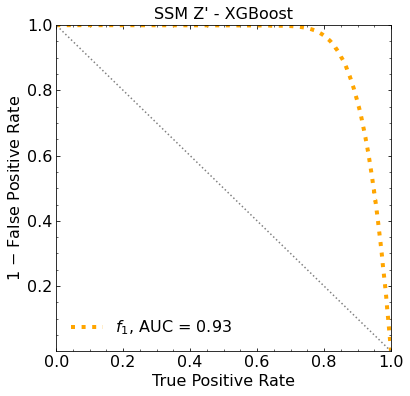


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63907	validation_1-logloss:0.63933
[1]	validation_0-logloss:0.59475	validation_1-logloss:0.59512
[2]	validation_0-logloss:0.55773	validation_1-logloss:0.55814
[3]	validation_0-logloss:0.52642	validation_1-logloss:0.52700
[4]	validation_0-logloss:0.49908	validation_1-logloss:0.49982
[5]	validation_0-logloss:0.47613	validation_1-logloss:0.47699
[6]	validation_0-logloss:0.45636	validation_1-logloss:0.45735
[7]	validation_0-logloss:0.43854	validation_1-logloss:0.43971
[8]	validation_0-logloss:0.42322	validation_1-logloss:0.42450
[9]	validation_0-logloss:0.41002	validation_1-logloss:0.41142
[10]	validation_0-logloss:0.39833	validation_1-logloss:0.39986
[11]	validation_0-logloss:0.38821	validation_1-logloss:0.38987
[12]	validation_0-logloss:0.37898	validation_1-logloss:0.38072
[13]	validation_0-logloss:0.37104	validation_1-logloss:0.37287
[14]	validation_0-logloss:0.36399	validation_1-logloss:0.36588
[15]	validation_0-logloss:0.35754	validation_1-logloss:0.35957
[1

[130]	validation_0-logloss:0.28071	validation_1-logloss:0.28803
[131]	validation_0-logloss:0.28068	validation_1-logloss:0.28803
[132]	validation_0-logloss:0.28065	validation_1-logloss:0.28802
[133]	validation_0-logloss:0.28059	validation_1-logloss:0.28800
[134]	validation_0-logloss:0.28055	validation_1-logloss:0.28800
[135]	validation_0-logloss:0.28051	validation_1-logloss:0.28798
[136]	validation_0-logloss:0.28047	validation_1-logloss:0.28797
[137]	validation_0-logloss:0.28043	validation_1-logloss:0.28796
[138]	validation_0-logloss:0.28040	validation_1-logloss:0.28796
[139]	validation_0-logloss:0.28036	validation_1-logloss:0.28795
[140]	validation_0-logloss:0.28033	validation_1-logloss:0.28795
[141]	validation_0-logloss:0.28031	validation_1-logloss:0.28795
[142]	validation_0-logloss:0.28028	validation_1-logloss:0.28795
[143]	validation_0-logloss:0.28025	validation_1-logloss:0.28795
[144]	validation_0-logloss:0.28020	validation_1-logloss:0.28795
[145]	validation_0-logloss:0.28018	valid

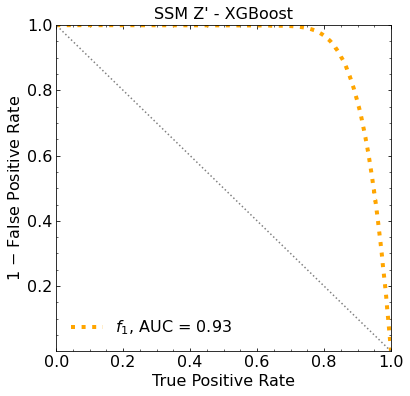


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63928	validation_1-logloss:0.63945
[1]	validation_0-logloss:0.59486	validation_1-logloss:0.59506
[2]	validation_0-logloss:0.55772	validation_1-logloss:0.55808
[3]	validation_0-logloss:0.52634	validation_1-logloss:0.52668
[4]	validation_0-logloss:0.49930	validation_1-logloss:0.49979
[5]	validation_0-logloss:0.47603	validation_1-logloss:0.47680
[6]	validation_0-logloss:0.45610	validation_1-logloss:0.45685
[7]	validation_0-logloss:0.43890	validation_1-logloss:0.43973
[8]	validation_0-logloss:0.42383	validation_1-logloss:0.42478
[9]	validation_0-logloss:0.41061	validation_1-logloss:0.41162
[10]	validation_0-logloss:0.39938	validation_1-logloss:0.40050
[11]	validation_0-logloss:0.38901	validation_1-logloss:0.39022
[12]	validation_0-logloss:0.37971	validation_1-logloss:0.38094
[13]	validation_0-logloss:0.37207	validation_1-logloss:0.37337
[14]	validation_0-logloss:0.36490	validation_1-logloss:0.36627
[15]	validation_0-logloss:0.35838	validation_1-logloss:0.35980
[1

[130]	validation_0-logloss:0.28260	validation_1-logloss:0.28807
[131]	validation_0-logloss:0.28256	validation_1-logloss:0.28807
[132]	validation_0-logloss:0.28249	validation_1-logloss:0.28807
[133]	validation_0-logloss:0.28247	validation_1-logloss:0.28806
[134]	validation_0-logloss:0.28243	validation_1-logloss:0.28806
[135]	validation_0-logloss:0.28239	validation_1-logloss:0.28806
[136]	validation_0-logloss:0.28236	validation_1-logloss:0.28805
[137]	validation_0-logloss:0.28231	validation_1-logloss:0.28805
[138]	validation_0-logloss:0.28229	validation_1-logloss:0.28804
[139]	validation_0-logloss:0.28220	validation_1-logloss:0.28799
[140]	validation_0-logloss:0.28217	validation_1-logloss:0.28799
[141]	validation_0-logloss:0.28211	validation_1-logloss:0.28797
[142]	validation_0-logloss:0.28206	validation_1-logloss:0.28796
[143]	validation_0-logloss:0.28204	validation_1-logloss:0.28796
[144]	validation_0-logloss:0.28202	validation_1-logloss:0.28796
[145]	validation_0-logloss:0.28197	valid

[259]	validation_0-logloss:0.27844	validation_1-logloss:0.28779
[260]	validation_0-logloss:0.27843	validation_1-logloss:0.28780
[261]	validation_0-logloss:0.27839	validation_1-logloss:0.28780
[262]	validation_0-logloss:0.27837	validation_1-logloss:0.28780
[263]	validation_0-logloss:0.27835	validation_1-logloss:0.28780
[264]	validation_0-logloss:0.27833	validation_1-logloss:0.28781
[265]	validation_0-logloss:0.27831	validation_1-logloss:0.28781
[266]	validation_0-logloss:0.27828	validation_1-logloss:0.28781
[267]	validation_0-logloss:0.27822	validation_1-logloss:0.28779
[268]	validation_0-logloss:0.27820	validation_1-logloss:0.28779
[269]	validation_0-logloss:0.27818	validation_1-logloss:0.28780
[270]	validation_0-logloss:0.27813	validation_1-logloss:0.28780
[271]	validation_0-logloss:0.27810	validation_1-logloss:0.28780
[272]	validation_0-logloss:0.27808	validation_1-logloss:0.28780
[273]	validation_0-logloss:0.27805	validation_1-logloss:0.28781
[274]	validation_0-logloss:0.27802	valid

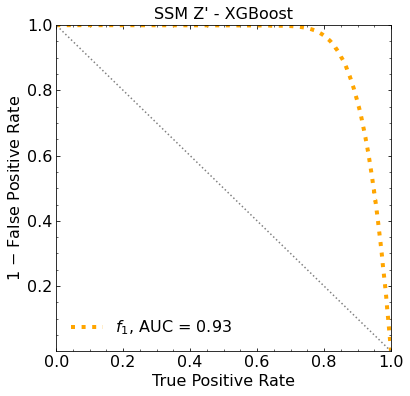


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63889	validation_1-logloss:0.63933
[1]	validation_0-logloss:0.59467	validation_1-logloss:0.59506
[2]	validation_0-logloss:0.55775	validation_1-logloss:0.55818
[3]	validation_0-logloss:0.52658	validation_1-logloss:0.52712
[4]	validation_0-logloss:0.49931	validation_1-logloss:0.49999
[5]	validation_0-logloss:0.47648	validation_1-logloss:0.47730
[6]	validation_0-logloss:0.45646	validation_1-logloss:0.45736
[7]	validation_0-logloss:0.43911	validation_1-logloss:0.44006
[8]	validation_0-logloss:0.42386	validation_1-logloss:0.42492
[9]	validation_0-logloss:0.41085	validation_1-logloss:0.41197
[10]	validation_0-logloss:0.39900	validation_1-logloss:0.40018
[11]	validation_0-logloss:0.38913	validation_1-logloss:0.39039
[12]	validation_0-logloss:0.38009	validation_1-logloss:0.38145
[13]	validation_0-logloss:0.37216	validation_1-logloss:0.37362
[14]	validation_0-logloss:0.36506	validation_1-logloss:0.36659
[15]	validation_0-logloss:0.35869	validation_1-logloss:0.36034
[1

[130]	validation_0-logloss:0.28118	validation_1-logloss:0.28791
[131]	validation_0-logloss:0.28113	validation_1-logloss:0.28790
[132]	validation_0-logloss:0.28109	validation_1-logloss:0.28790
[133]	validation_0-logloss:0.28105	validation_1-logloss:0.28791
[134]	validation_0-logloss:0.28103	validation_1-logloss:0.28791
[135]	validation_0-logloss:0.28097	validation_1-logloss:0.28789
[136]	validation_0-logloss:0.28093	validation_1-logloss:0.28789
[137]	validation_0-logloss:0.28084	validation_1-logloss:0.28785
[138]	validation_0-logloss:0.28080	validation_1-logloss:0.28784
[139]	validation_0-logloss:0.28079	validation_1-logloss:0.28784
[140]	validation_0-logloss:0.28076	validation_1-logloss:0.28784
[141]	validation_0-logloss:0.28073	validation_1-logloss:0.28783
[142]	validation_0-logloss:0.28070	validation_1-logloss:0.28783
[143]	validation_0-logloss:0.28066	validation_1-logloss:0.28784
[144]	validation_0-logloss:0.28059	validation_1-logloss:0.28781
[145]	validation_0-logloss:0.28057	valid

[259]	validation_0-logloss:0.27710	validation_1-logloss:0.28770
[260]	validation_0-logloss:0.27709	validation_1-logloss:0.28770
[261]	validation_0-logloss:0.27705	validation_1-logloss:0.28770
[262]	validation_0-logloss:0.27703	validation_1-logloss:0.28770
[263]	validation_0-logloss:0.27699	validation_1-logloss:0.28771
[264]	validation_0-logloss:0.27696	validation_1-logloss:0.28770
[265]	validation_0-logloss:0.27692	validation_1-logloss:0.28770
[266]	validation_0-logloss:0.27689	validation_1-logloss:0.28771
[267]	validation_0-logloss:0.27687	validation_1-logloss:0.28771
[268]	validation_0-logloss:0.27685	validation_1-logloss:0.28771
[269]	validation_0-logloss:0.27684	validation_1-logloss:0.28771
[270]	validation_0-logloss:0.27681	validation_1-logloss:0.28771
[271]	validation_0-logloss:0.27677	validation_1-logloss:0.28771
[272]	validation_0-logloss:0.27674	validation_1-logloss:0.28771
[273]	validation_0-logloss:0.27673	validation_1-logloss:0.28771
[274]	validation_0-logloss:0.27671	valid

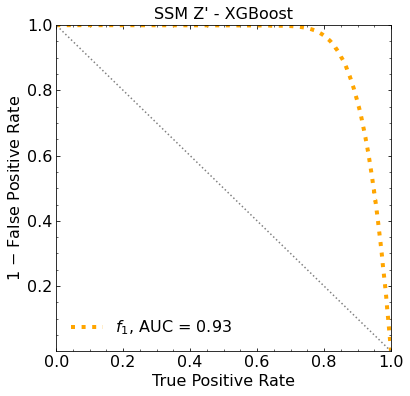


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.63909	validation_1-logloss:0.63932
[1]	validation_0-logloss:0.59446	validation_1-logloss:0.59479
[2]	validation_0-logloss:0.55746	validation_1-logloss:0.55783
[3]	validation_0-logloss:0.52614	validation_1-logloss:0.52676
[4]	validation_0-logloss:0.49902	validation_1-logloss:0.49978
[5]	validation_0-logloss:0.47608	validation_1-logloss:0.47694
[6]	validation_0-logloss:0.45598	validation_1-logloss:0.45694
[7]	validation_0-logloss:0.43859	validation_1-logloss:0.43970
[8]	validation_0-logloss:0.42367	validation_1-logloss:0.42494
[9]	validation_0-logloss:0.41021	validation_1-logloss:0.41161
[10]	validation_0-logloss:0.39894	validation_1-logloss:0.40049
[11]	validation_0-logloss:0.38857	validation_1-logloss:0.39022
[12]	validation_0-logloss:0.37950	validation_1-logloss:0.38121
[13]	validation_0-logloss:0.37172	validation_1-logloss:0.37356
[14]	validation_0-logloss:0.36445	validation_1-logloss:0.36636
[15]	validation_0-logloss:0.35795	validation_1-logloss:0.36000
[1

[130]	validation_0-logloss:0.28139	validation_1-logloss:0.28794
[131]	validation_0-logloss:0.28137	validation_1-logloss:0.28794
[132]	validation_0-logloss:0.28133	validation_1-logloss:0.28793
[133]	validation_0-logloss:0.28129	validation_1-logloss:0.28792
[134]	validation_0-logloss:0.28126	validation_1-logloss:0.28792
[135]	validation_0-logloss:0.28123	validation_1-logloss:0.28791
[136]	validation_0-logloss:0.28121	validation_1-logloss:0.28790
[137]	validation_0-logloss:0.28116	validation_1-logloss:0.28790
[138]	validation_0-logloss:0.28113	validation_1-logloss:0.28790
[139]	validation_0-logloss:0.28108	validation_1-logloss:0.28789
[140]	validation_0-logloss:0.28104	validation_1-logloss:0.28787
[141]	validation_0-logloss:0.28099	validation_1-logloss:0.28788
[142]	validation_0-logloss:0.28095	validation_1-logloss:0.28786
[143]	validation_0-logloss:0.28092	validation_1-logloss:0.28786
[144]	validation_0-logloss:0.28090	validation_1-logloss:0.28785
[145]	validation_0-logloss:0.28087	valid

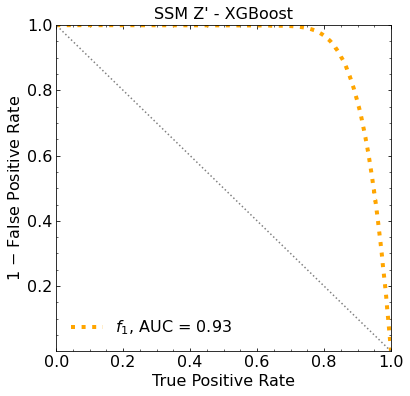


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


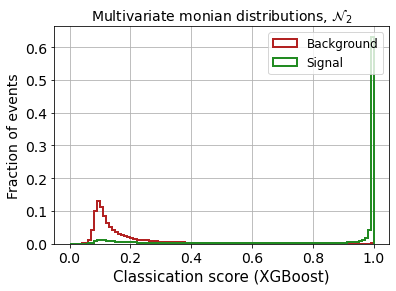

Classification score (10ML):


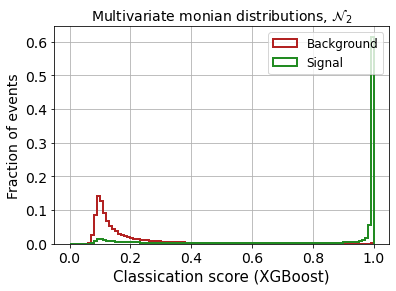

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [16]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]


ntrials = 5000

[2, 5, 8, 12, 25, 37, 50, 125]


### 0. BINNING WITH CROSS-VALIDATION

### Numbers of bins

 BINNING 


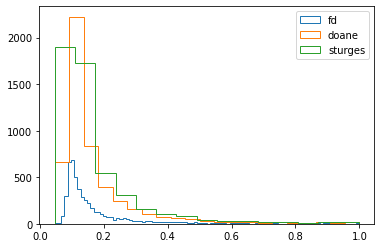

fd 94
doane 21
sturges 15
 


In [17]:
print(' BINNING ')

divs_B = int(len(pred_XG_SM)/B_expected)

B_1 = []
B_2 = []
B_3 = []

for it in range(divs_B):
    datB_grid_SM = pred_XG_SM[(B_expected*it):(B_expected*(it+1))]
    datB_grid_NP = pred_XG_NP[:B_expected]

    B_hist1 = np.histogram_bin_edges(datB_grid_SM, bins = 'fd')
    B_hist2 = np.histogram_bin_edges(datB_grid_SM, bins = 'doane')
    B_hist3 = np.histogram_bin_edges(datB_grid_SM, bins = 'sturges')

    B_1.append(len(B_hist1))
    B_2.append(len(B_hist2))
    B_3.append(len(B_hist3))



B_1_mean = int(np.mean(B_1))
B_2_mean = int(np.mean(B_2))
B_3_mean = int(np.mean(B_3))


B_hist1 = plt.hist(datB_grid_SM, bins = B_1_mean, histtype = 'step', label = 'fd')
B_hist2 = plt.hist(datB_grid_SM, bins = B_2_mean, histtype = 'step', label = 'doane')
B_hist3 = plt.hist(datB_grid_SM, bins = B_3_mean, histtype = 'step', label = 'sturges')
plt.legend()
plt.show()


print('fd', B_1_mean)
print('doane', B_2_mean)
print('sturges', B_3_mean)
print(' ')

B_bins_mean = [B_1_mean, B_2_mean, B_3_mean]

### Binning with cross-validation - equal size bins

In [18]:
# eq size with cross-val method to determine Nbin
Z_bins_XG_CV0 = []
Z_bins_XG_CV1 = []
Z_bins_XG_CV2 = []

Z_bins_XG_CV0_zeros = []
Z_bins_XG_CV1_zeros = []
Z_bins_XG_CV2_zeros = []



for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    
    
    
    
    ###############################
    # EQ SIZE CROSS-VAL FOR Nbins #
    ###############################


    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]

    Z_bins_XG_CV = []
    Z_bins_XG_CV_zeros = []

    for j_it in range(len(B_bins_mean)):

        # bin the parameter space of all background events
        hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(B_bins_mean[j_it]), range = [[min(pred_XG_SM),max(pred_XG_SM)]])
        bin_edges = binedges_back[0]

        if min(hist_back) >= 5*N_ensembles_back:
            print('ok j_it=', j_it)

            # now divide by the number of possible ensembles
            back_prom = hist_back/N_ensembles_back

            # same for signal
            hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
            sig_prom = hist_sig/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_CV_aux = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

        else:
            print('NO ok j_it=', j_it)
            Z_bins_XG_CV_aux = 0

        Z_bins_XG_CV.append(Z_bins_XG_CV_aux)


        # REPLACE the zeros
        hist_back_noceros = []
        for i in range(len(hist_back)):
            if hist_back[i]!=0:
                hist_back_noceros.append(hist_back[i])

        min_back = min(hist_back_noceros)

        # replace the zeros
        for i in range(len(hist_back)):
            if hist_back[i]==0:
                hist_back[i] = min_back

        # now divide by the number of possible ensembles
        back_prom = hist_back/N_ensembles_back

        # same for signal
        hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
        sig_prom = hist_sig/N_ensembles_sig

        Z_bins_XG_CV_zeros.append( ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5 )


    Z_bins_XG_CV0.append(Z_bins_XG_CV[0])
    Z_bins_XG_CV1.append(Z_bins_XG_CV[1])
    Z_bins_XG_CV2.append(Z_bins_XG_CV[2])

    Z_bins_XG_CV0_zeros.append(Z_bins_XG_CV_zeros[0])
    Z_bins_XG_CV1_zeros.append(Z_bins_XG_CV_zeros[1])
    Z_bins_XG_CV2_zeros.append(Z_bins_XG_CV_zeros[2])

    print(' ')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 


In [19]:
print(Z_bins_XG_CV0)
print(Z_bins_XG_CV1)
print(Z_bins_XG_CV2)

print(Z_bins_XG_CV0_zeros)
print(Z_bins_XG_CV1_zeros)
print(Z_bins_XG_CV2_zeros)

[0, 0, 0, 0, 0, 0, 0, 0]
[0.3383957129886124, 0.81443371541356, 1.2585801520942341, 1.8098728453693425, 3.3659348878384914, 4.583466282481105, 5.745175022792261, 10.802195911245686]
[0.3072929553939598, 0.7446315179578153, 1.157391991851383, 1.6752291330876647, 3.1627596168727723, 4.346212901643765, 5.486430687890932, 10.517023936248878]
[0.4946770925388889, 1.1376995689635836, 1.6984953510537084, 2.357911414678695, 4.0867430282882315, 5.363139996700794, 6.547994629394269, 11.559400920478485]
[0.3383957129886124, 0.81443371541356, 1.2585801520942341, 1.8098728453693425, 3.3659348878384914, 4.583466282481105, 5.745175022792261, 10.802195911245686]
[0.3072929553939598, 0.7446315179578153, 1.157391991851383, 1.6752291330876647, 3.1627596168727723, 4.346212901643765, 5.486430687890932, 10.517023936248878]


In [ ]:
Z_bins_XG_CV0 = 
Z_bins_XG_CV1 = 
Z_bins_XG_CV2 = 

Z_bins_XG_CV0_zeros = 
Z_bins_XG_CV1_zeros = 
Z_bins_XG_CV2_zeros = 

<ipython-input-20-b6791d54c268>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd')
<ipython-input-20-b6791d54c268>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')
<ipython-input-20-b6791d54c268>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges')
<ipython-input-20-b6791d54c268>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argum

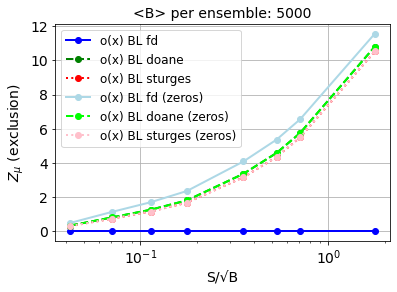

In [20]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')  
plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV0_zeros, '-ok', color='lightblue', lw=lw, label='o(x) BL fd (zeros)') 
plt.plot(posX, Z_bins_XG_CV1_zeros, '--ok', color='lime', lw=lw, label='o(x) BL doane (zeros)') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':ok', color='pink', lw=lw, label='o(x) BL sturges (zeros)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Binning with cross-validation - non-equal size bins

In [21]:
########################################################################
# RANDOM BINNING with CROSS-VAL FOR Nbins and CROSS-VAL for the random #
########################################################################

num_SM = int(len(pred_XG_SM)/6)
num_NP = int(len(pred_XG_NP)/6)

numdat = min(num_SM, num_NP)

data_grid_SM_0 = pred_XG_SM[(0*numdat):(1*numdat)]
data_grid_NP_0 = pred_XG_NP[(0*numdat):(1*numdat)]

data_grid_SM_1 = pred_XG_SM[(1*numdat):(2*numdat)]
data_grid_NP_1 = pred_XG_NP[(1*numdat):(2*numdat)]

data_grid_SM_2 = pred_XG_SM[(2*numdat):(3*numdat)]
data_grid_NP_2 = pred_XG_NP[(2*numdat):(3*numdat)]

data_grid_SM_3 = pred_XG_SM[(3*numdat):(4*numdat)]
data_grid_NP_3 = pred_XG_NP[(3*numdat):(4*numdat)]

data_grid_SM_4 = pred_XG_SM[(4*numdat):(5*numdat)]
data_grid_NP_4 = pred_XG_NP[(4*numdat):(5*numdat)]

data_grid_SM_5 = pred_XG_SM[(5*numdat):(6*numdat)]
data_grid_NP_5 = pred_XG_NP[(5*numdat):(6*numdat)]



# cross-val method to determine the random binning
CV0_chi2 = []
CV1_chi2 = []
CV2_chi2 = []

CV0_chi2_N = []
CV1_chi2_N = []
CV2_chi2_N = []

CV0_MSE = []
CV1_MSE = []
CV2_MSE = []

CV0_poiss = []
CV1_poiss = []
CV2_poiss = []


CV0_chi2_eqsize = []
CV1_chi2_eqsize = []
CV2_chi2_eqsize = []

CV0_chi2_N_eqsize = []
CV1_chi2_N_eqsize = []
CV2_chi2_N_eqsize = []

CV0_MSE_eqsize = []
CV1_MSE_eqsize = []
CV2_MSE_eqsize = []

CV0_poiss_eqsize = []
CV1_poiss_eqsize = []
CV2_poiss_eqsize = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2 = []
Z_bins_XG_CV1_chi2 = []
Z_bins_XG_CV2_chi2 = []

Z_bins_XG_CV0_chi2_N = []
Z_bins_XG_CV1_chi2_N = []
Z_bins_XG_CV2_chi2_N = []

Z_bins_XG_CV0_MSE = []
Z_bins_XG_CV1_MSE = []
Z_bins_XG_CV2_MSE = []

Z_bins_XG_CV0_poiss = []
Z_bins_XG_CV1_poiss = []
Z_bins_XG_CV2_poiss = []


# THE SAME but replacin the zeros in the binning

# cross-val method to determine the random binning
CV0_chi2_zeros = []
CV1_chi2_zeros = []
CV2_chi2_zeros = []

CV0_chi2_N_zeros = []
CV1_chi2_N_zeros = []
CV2_chi2_N_zeros = []

CV0_MSE_zeros = []
CV1_MSE_zeros = []
CV2_MSE_zeros = []

CV0_poiss_zeros = []
CV1_poiss_zeros = []
CV2_poiss_zeros = []


CV0_chi2_eqsize_zeros = []
CV1_chi2_eqsize_zeros = []
CV2_chi2_eqsize_zeros = []

CV0_chi2_N_eqsize_zeros = []
CV1_chi2_N_eqsize_zeros = []
CV2_chi2_N_eqsize_zeros = []

CV0_MSE_eqsize_zeros = []
CV1_MSE_eqsize_zeros = []
CV2_MSE_eqsize_zeros = []

CV0_poiss_eqsize_zeros = []
CV1_poiss_eqsize_zeros = []
CV2_poiss_eqsize_zeros = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2_zeros = []
Z_bins_XG_CV1_chi2_zeros = []
Z_bins_XG_CV2_chi2_zeros = []

Z_bins_XG_CV0_chi2_N_zeros = []
Z_bins_XG_CV1_chi2_N_zeros = []
Z_bins_XG_CV2_chi2_N_zeros = []

Z_bins_XG_CV0_MSE_zeros = []
Z_bins_XG_CV1_MSE_zeros = []
Z_bins_XG_CV2_MSE_zeros = []

Z_bins_XG_CV0_poiss_zeros = []
Z_bins_XG_CV1_poiss_zeros = []
Z_bins_XG_CV2_poiss_zeros = []




for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    Z_bins_XG_CV_rd = []

    chi2 = []
    chi2_N = []
    MSE = []
    poiss = []


    Z_bins_XG_CV_rd_zeros = []

    chi2_zeros = []
    chi2_N_zeros = []
    MSE_zeros = []
    poiss_zeros = []


    # Les't find the number of possible ensembles
    N_ensembles_back = len(data_grid_SM_0) / B_expected
    N_ensembles_sig = len(data_grid_NP_0) / S_expected[iii]



    for j_it in range(len(B_bins_mean)):

        print('doing Nbin: ', B_bins_mean[j_it])

        for i_it in range(ntrials):

            if i_it == 0:
                # bin the parameter space of all background events
                bin_edges = np.linspace( min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]+1) )

            else:
                bin_edges = np.hstack( (min(pred_XG_SM), np.sort( np.random.uniform(min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]-1)) ), max(pred_XG_SM) ) )

            hist_SM_0, _ = np.histogramdd([data_grid_SM_0], bins = [bin_edges])
            hist_SM_1, _ = np.histogramdd([data_grid_SM_1], bins = [bin_edges])
            hist_SM_2, _ = np.histogramdd([data_grid_SM_2], bins = [bin_edges])
            hist_SM_3, _ = np.histogramdd([data_grid_SM_3], bins = [bin_edges])

            mean = (hist_SM_0 + hist_SM_1 + hist_SM_2 + hist_SM_3 )/4

            if min(mean)>= 5*N_ensembles_back:

                ##################
                # COMPUTE METRIC #
                ##################
                hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

                aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
                aux_chi2_N = aux_chi2 / j_it
                aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
                aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


                #############
                # COMPUTE Z #
                #############
                # bin the parameter space of all background events
                hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

                # now divide by the number of possible ensembles
                back_prom_5 = hist_SM_5/N_ensembles_back

                # same for signal
                hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

                sig_prom_5 = hist_NP_5/N_ensembles_sig

                # then the signif Z^binned-Asimov:
                Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            else:
                Z_bins_XG_aux = 0
                aux_chi2 = 9999
                aux_chi2_N = 9999
                aux_MSE = 9999
                aux_poiss = 9999

            Z_bins_XG_CV_rd.append(Z_bins_XG_aux)
            chi2.append(aux_chi2)
            chi2_N.append(aux_chi2_N)
            MSE.append(aux_MSE)
            poiss.append(aux_poiss)



            # REPLACE the zeros
            mean_noceros = []
            for i in range(len(mean)):
                if mean[i]!=0:
                    mean_noceros.append(mean[i])

            min_mean = min(mean_noceros)

            # replace the zeros
            for i in range(len(mean)):
                if mean[i]==0:
                    mean[i] = min_mean


            ##################
            # COMPUTE METRIC #
            ##################
            hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]!=0:
                    hist_back_noceros.append(hist_SM_4[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]==0:
                    hist_SM_4[i] = min_back

            aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
            aux_chi2_N = aux_chi2 / j_it
            aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
            aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


            #############
            # COMPUTE Z #
            #############
            # bin the parameter space of all background events
            hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]!=0:
                    hist_back_noceros.append(hist_SM_5[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]==0:
                    hist_SM_5[i] = min_back

            # now divide by the number of possible ensembles
            back_prom_5 = hist_SM_5/N_ensembles_back

            # same for signal
            hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

            sig_prom_5 = hist_NP_5/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            Z_bins_XG_CV_rd_zeros.append(Z_bins_XG_aux)
            chi2_zeros.append(aux_chi2)
            chi2_N_zeros.append(aux_chi2_N)
            MSE_zeros.append(aux_MSE)
            poiss_zeros.append(aux_poiss)




    ################################################
    # SELECT THE BINNING with MINIMUM METRIC VALUE #
    ################################################

    # the value of the metric
    chi2_per_bin = []
    chi2_N_per_bin = []
    MSE_per_bin = []
    poiss_per_bin = []

    chi2_per_bin_eqsize = []
    chi2_N_per_bin_eqsize = []
    MSE_per_bin_eqsize = []
    poiss_per_bin_eqsize = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin.append( np.min(chi2[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin.append( np.min(chi2_N[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin.append( np.min(MSE[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin.append( np.min(poiss[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize.append( chi2[ntrials*i] )
        chi2_N_per_bin_eqsize.append( chi2_N[ntrials*i] )
        MSE_per_bin_eqsize.append( MSE[ntrials*i] )
        poiss_per_bin_eqsize.append( poiss[ntrials*i] )


    CV0_chi2.append(chi2_per_bin[0])
    CV1_chi2.append(chi2_per_bin[1])
    CV2_chi2.append(chi2_per_bin[2])

    CV0_chi2_N.append(chi2_N_per_bin[0])
    CV1_chi2_N.append(chi2_N_per_bin[1])
    CV2_chi2_N.append(chi2_N_per_bin[2])

    CV0_MSE.append(MSE_per_bin[0])
    CV1_MSE.append(MSE_per_bin[1])
    CV2_MSE.append(MSE_per_bin[2])

    CV0_poiss.append(poiss_per_bin[0])
    CV1_poiss.append(poiss_per_bin[1])
    CV2_poiss.append(poiss_per_bin[2])



    CV0_chi2_eqsize.append(chi2_per_bin_eqsize[0])
    CV1_chi2_eqsize.append(chi2_per_bin_eqsize[1])
    CV2_chi2_eqsize.append(chi2_per_bin_eqsize[2])

    CV0_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[0])
    CV1_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[1])
    CV2_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[2])

    CV0_MSE_eqsize.append(MSE_per_bin_eqsize[0])
    CV1_MSE_eqsize.append(MSE_per_bin_eqsize[1])
    CV2_MSE_eqsize.append(MSE_per_bin_eqsize[2])

    CV0_poiss_eqsize.append(poiss_per_bin_eqsize[0])
    CV1_poiss_eqsize.append(poiss_per_bin_eqsize[1])
    CV2_poiss_eqsize.append(poiss_per_bin_eqsize[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin = []
    Z_chi2_N_per_bin = []
    Z_MSE_per_bin = []
    Z_poiss_per_bin = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2_N[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin.append( Z_bins_XG_CV_rd[np.argmin(MSE[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin.append( Z_bins_XG_CV_rd[np.argmin(poiss[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2.append(Z_chi2_per_bin[0])
    Z_bins_XG_CV1_chi2.append(Z_chi2_per_bin[1])
    Z_bins_XG_CV2_chi2.append(Z_chi2_per_bin[2])

    Z_bins_XG_CV0_chi2_N.append(Z_chi2_N_per_bin[0])
    Z_bins_XG_CV1_chi2_N.append(Z_chi2_N_per_bin[1])
    Z_bins_XG_CV2_chi2_N.append(Z_chi2_N_per_bin[2])

    Z_bins_XG_CV0_MSE.append(Z_MSE_per_bin[0])
    Z_bins_XG_CV1_MSE.append(Z_MSE_per_bin[1])
    Z_bins_XG_CV2_MSE.append(Z_MSE_per_bin[2])

    Z_bins_XG_CV0_poiss.append(Z_poiss_per_bin[0])
    Z_bins_XG_CV1_poiss.append(Z_poiss_per_bin[1])
    Z_bins_XG_CV2_poiss.append(Z_poiss_per_bin[2])




    # SAME for replacing the zeros in the binning
    # the value of the metric
    chi2_per_bin_zeros = []
    chi2_N_per_bin_zeros = []
    MSE_per_bin_zeros = []
    poiss_per_bin_zeros = []

    chi2_per_bin_eqsize_zeros = []
    chi2_N_per_bin_eqsize_zeros = []
    MSE_per_bin_eqsize_zeros = []
    poiss_per_bin_eqsize_zeros = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin_zeros.append( np.min(chi2_zeros[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin_zeros.append( np.min(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin_zeros.append( np.min(MSE_zeros[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin_zeros.append( np.min(poiss_zeros[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize_zeros.append( chi2_zeros[ntrials*i] )
        chi2_N_per_bin_eqsize_zeros.append( chi2_N_zeros[ntrials*i] )
        MSE_per_bin_eqsize_zeros.append( MSE_zeros[ntrials*i] )
        poiss_per_bin_eqsize_zeros.append( poiss_zeros[ntrials*i] )


    CV0_chi2_zeros.append(chi2_per_bin_zeros[0])
    CV1_chi2_zeros.append(chi2_per_bin_zeros[1])
    CV2_chi2_zeros.append(chi2_per_bin_zeros[2])

    CV0_chi2_N_zeros.append(chi2_N_per_bin_zeros[0])
    CV1_chi2_N_zeros.append(chi2_N_per_bin_zeros[1])
    CV2_chi2_N_zeros.append(chi2_N_per_bin_zeros[2])

    CV0_MSE_zeros.append(MSE_per_bin_zeros[0])
    CV1_MSE_zeros.append(MSE_per_bin_zeros[1])
    CV2_MSE_zeros.append(MSE_per_bin_zeros[2])

    CV0_poiss_zeros.append(poiss_per_bin_zeros[0])
    CV1_poiss_zeros.append(poiss_per_bin_zeros[1])
    CV2_poiss_zeros.append(poiss_per_bin_zeros[2])



    CV0_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[0])
    CV1_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[1])
    CV2_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[2])

    CV0_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[0])
    CV1_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[1])
    CV2_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[2])

    CV0_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[0])
    CV1_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[1])
    CV2_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[2])

    CV0_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[0])
    CV1_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[1])
    CV2_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin_zeros = []
    Z_chi2_N_per_bin_zeros = []
    Z_MSE_per_bin_zeros = []
    Z_poiss_per_bin_zeros = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(MSE_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(poiss_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2_zeros.append(Z_chi2_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_zeros.append(Z_chi2_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_zeros.append(Z_chi2_per_bin_zeros[2])

    Z_bins_XG_CV0_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[2])

    Z_bins_XG_CV0_MSE_zeros.append(Z_MSE_per_bin_zeros[0])
    Z_bins_XG_CV1_MSE_zeros.append(Z_MSE_per_bin_zeros[1])
    Z_bins_XG_CV2_MSE_zeros.append(Z_MSE_per_bin_zeros[2])

    Z_bins_XG_CV0_poiss_zeros.append(Z_poiss_per_bin_zeros[0])
    Z_bins_XG_CV1_poiss_zeros.append(Z_poiss_per_bin_zeros[1])
    Z_bins_XG_CV2_poiss_zeros.append(Z_poiss_per_bin_zeros[2])
    
    print(' ')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
doing Nbin:  94


<ipython-input-21-31abcaeaab5c>:266: RuntimeWarning: divide by zero encountered in double_scalars
  aux_chi2_N = aux_chi2 / j_it
<ipython-input-21-31abcaeaab5c>:267: RuntimeWarning: divide by zero encountered in double_scalars
  aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it


doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
doing Nbin:  94
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
doing Nbin:  94
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
doing Nbin:  94
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
doing Nbin:  94
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
doing Nbin:  94
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
doing Nbin:  94
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
doing Nbin:  94
doing Nbin:  21
doing Nbin:  15
 


In [22]:
print(Z_bins_XG_CV0_chi2)
print(Z_bins_XG_CV1_chi2)
print(Z_bins_XG_CV2_chi2)

print(Z_bins_XG_CV0_chi2_N)
print(Z_bins_XG_CV1_chi2_N)
print(Z_bins_XG_CV2_chi2_N)

print(Z_bins_XG_CV0_MSE)
print(Z_bins_XG_CV1_MSE)
print(Z_bins_XG_CV2_MSE)

print(Z_bins_XG_CV0_poiss)
print(Z_bins_XG_CV1_poiss)
print(Z_bins_XG_CV2_poiss)



print(Z_bins_XG_CV0_chi2_zeros)
print(Z_bins_XG_CV1_chi2_zeros)
print(Z_bins_XG_CV2_chi2_zeros)

print(Z_bins_XG_CV0_chi2_N_zeros)
print(Z_bins_XG_CV1_chi2_N_zeros)
print(Z_bins_XG_CV2_chi2_N_zeros)

print(Z_bins_XG_CV0_MSE_zeros)
print(Z_bins_XG_CV1_MSE_zeros)
print(Z_bins_XG_CV2_MSE_zeros)

print(Z_bins_XG_CV0_poiss_zeros)
print(Z_bins_XG_CV1_poiss_zeros)
print(Z_bins_XG_CV2_poiss_zeros)

[0, 0, 0, 0, 0, 0, 0, 0]
[0.296147825924517, 0.9269805255337806, 1.502616933032995, 1.9858458096536593, 2.598663189829944, 3.996085226510003, 5.823716813056825, 11.266909275857525]
[0.22151034039369116, 0.8287395805025789, 0.9934381664839358, 1.586762663606063, 2.6524146115786187, 2.8431759385122555, 6.107103794451158, 11.195127911530623]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.296147825924517, 0.9269805255337806, 1.502616933032995, 1.9858458096536593, 2.598663189829944, 3.996085226510003, 5.823716813056825, 11.266909275857525]
[0.22151034039369116, 0.8287395805025789, 0.9934381664839358, 1.586762663606063, 2.6524146115786187, 2.8431759385122555, 6.107103794451158, 11.195127911530623]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.40589966742814737, 0.6941483092300443, 1.230760574316599, 1.9858458096536593, 3.611035374365666, 5.038826169922018, 5.96110980783965, 10.753133085809871]
[0.15393811927795634, 0.8358675219355446, 1.0213509873417967, 1.5741851159058335, 3.0822457422117027, 4.267566910207109, 5.2872183902085

In [ ]:
Z_bins_XG_CV0_chi2 = 
Z_bins_XG_CV1_chi2 = 
Z_bins_XG_CV2_chi2 = 

Z_bins_XG_CV0_chi2_N = 
Z_bins_XG_CV1_chi2_N = 
Z_bins_XG_CV2_chi2_N = 

Z_bins_XG_CV0_MSE = 
Z_bins_XG_CV1_MSE = 
Z_bins_XG_CV2_MSE = 

Z_bins_XG_CV0_poiss = 
Z_bins_XG_CV1_poiss = 
Z_bins_XG_CV2_poiss = 



Z_bins_XG_CV0_chi2_zeros = 
Z_bins_XG_CV1_chi2_zeros = 
Z_bins_XG_CV2_chi2_zeros = 

Z_bins_XG_CV0_chi2_N_zeros = 
Z_bins_XG_CV1_chi2_N_zeros = 
Z_bins_XG_CV2_chi2_N_zeros = 

Z_bins_XG_CV0_MSE_zeros = 
Z_bins_XG_CV1_MSE_zeros = 
Z_bins_XG_CV2_MSE_zeros = 

Z_bins_XG_CV0_poiss_zeros = 
Z_bins_XG_CV1_poiss_zeros = 
Z_bins_XG_CV2_poiss_zeros = 

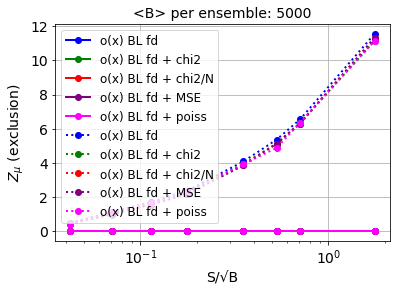

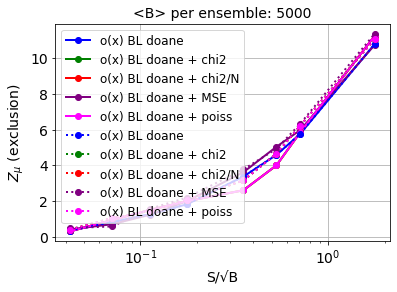

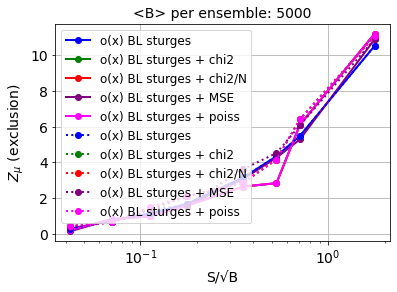

In [23]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2, '-o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N, '-o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE, '-o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss, '-o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 
plt.plot(posX, Z_bins_XG_CV0_zeros, ':o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()





plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV1, '-o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2, '-o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N, '-o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE, '-o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss, '-o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 
plt.plot(posX, Z_bins_XG_CV1_zeros, ':o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV2, '-o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2, '-o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N, '-o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE, '-o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss, '-o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 1. BIN LOG LIKELIHOOD

In [17]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [18]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.7198734326314086
Z_bins_logbins :  0.5743377061297351

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  1.5087523630592943
Z_bins_logbins :  1.287216086711132

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  2.1379892860499523
Z_bins_logbins :  1.888996488564647

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  2.842476663573421
Z_bins_logbins :  2.581213927501032

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  4.607525246235578
Z_bins_logbins :  4.351419072485188

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  5.879333998914241
Z_bins_logbins :  5.636552465909488

 ---

In [19]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.7198734326314086, 1.5087523630592943, 2.1379892860499523, 2.842476663573421, 4.607525246235578, 5.879333998914241, 7.051369949789876, 11.991357997875753]
[0.5743377061297351, 1.287216086711132, 1.888996488564647, 2.581213927501032, 4.351419072485188, 5.636552465909488, 6.821270732503225, 11.79973781611964]


In [24]:
store_Z_bins = [0.7198734326314086, 1.5087523630592943, 2.1379892860499523, 2.842476663573421, 4.607525246235578, 5.879333998914241, 7.051369949789876, 11.991357997875753]

store_Z_bins_logbins = [0.5743377061297351, 1.287216086711132, 1.888996488564647, 2.581213927501032, 4.351419072485188, 5.636552465909488, 6.821270732503225, 11.79973781611964]

<ipython-input-6-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-6-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


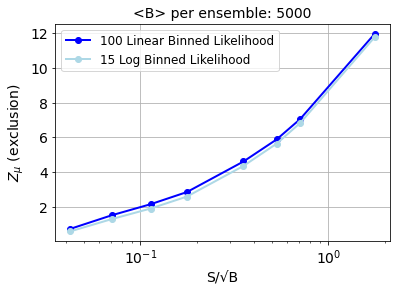

In [6]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [21]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.5053642241317947
Z_bins_XG_15bins :  0.30747532048417064
Z_bins_XG_15bins_1ML :  0.30241041179056416
Z_bins_XG_15bins_eq :  0.09054681373626018
Z_bins_XG_15bins_eq_1ML :  0.09044226172577798

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  1.1583112299350449
Z_bins_XG_15bins :  0.7451516008096714
Z_bins_XG_15bins_1ML :  0.7335902649594988
Z_bins_XG_15bins_eq :  0.22581299671908517
Z_bins_XG_15bins_eq_1ML :  0.22555286690200138

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  1.7252478977383388
Z_bins_XG_15bins :  1.1583049784126687
Z_bins_XG_15bins_1ML :  1.141293844314961
Z_bins_XG_15bins_eq :  0.360421913155264
Z_bins_XG_15bins_eq_1ML :  0.36000768014762025

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  

In [22]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.5053642241317947, 1.1583112299350449, 1.7252478977383388, 2.3898748891409727, 4.126575275007979, 5.406150978583369, 6.5931087564643045, 11.610875250720065]
[0.30747532048417064, 0.7451516008096714, 1.1583049784126687, 1.6767228381232695, 3.166344221100358, 4.351783307342766, 5.494095284824608, 10.534958952930516]
[0.30241041179056416, 0.7335902649594988, 1.141293844314961, 1.6536901725641415, 3.13002023844563, 4.308035371577756, 5.445052258117467, 10.474693668285123]
[0.09054681373626018, 0.22581299671908517, 0.360421913155264, 0.5388924925710661, 1.1111853983181137, 1.6293633850381035, 2.1803328940439317, 5.172537063732901]
[0.09044226172577798, 0.22555286690200138, 0.36000768014762025, 0.5382750339711042, 1.1099244510178605, 1.6275301821149857, 2.177901560029806, 5.167023837957638]


In [25]:
store_Z_bins_XG = [0.5053642241317947, 1.1583112299350449, 1.7252478977383388, 2.3898748891409727, 4.126575275007979, 5.406150978583369, 6.5931087564643045, 11.610875250720065]

store_Z_bins_XG_15bins = [0.30747532048417064, 0.7451516008096714, 1.1583049784126687, 1.6767228381232695, 3.166344221100358, 4.351783307342766, 5.494095284824608, 10.534958952930516]
store_Z_bins_XG_15bins_1ML = [0.30241041179056416, 0.7335902649594988, 1.141293844314961, 1.6536901725641415, 3.13002023844563, 4.308035371577756, 5.445052258117467, 10.474693668285123]

store_Z_bins_XG_15bins_eq = [0.09054681373626018, 0.22581299671908517, 0.360421913155264, 0.5388924925710661, 1.1111853983181137, 1.6293633850381035, 2.1803328940439317, 5.172537063732901]
store_Z_bins_XG_15bins_eq_1ML = [0.09044226172577798, 0.22555286690200138, 0.36000768014762025, 0.5382750339711042, 1.1099244510178605, 1.6275301821149857, 2.177901560029806, 5.167023837957638]

<ipython-input-8-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-8-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-8-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-8-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the

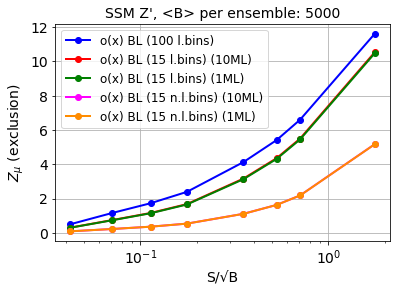

In [8]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf 13820.48317552 13831.97447158
 13836.43380817 13839.05669947 13835.49955865 13814.04227177
 13740.43024871 13546.68283528 13144.84990186 12469.90796417
 11499.99407003 10220.84120968  8623.55045996  6688.75263833
  4390.92089403  1776.9932224  -1129.61562659 -4356.9409405 ]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.0063479219593504735, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf           -inf 20617.91938074
 18916.49666064 17004.87892136 14947.47911289 12772.21037666
 10509.53695626  8161.31905613  5737.54817519  3253.12771017
   710.4173539  -1912.45525192 -4361.08433116 -5790.08166134]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.01329487353451575, kernel='epanechnikov')


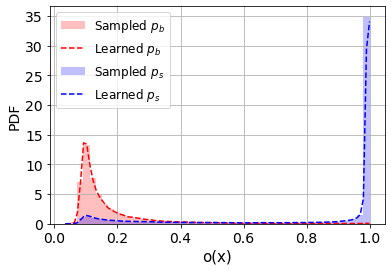


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



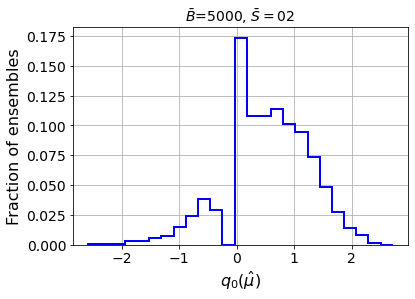

muhat mean:  0.12031939483084682
median q_muhat:  0.5652695469959776
Z_KDE:  0.7518440975335097
Z_KDE mu=0:  0.7518440975335097

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



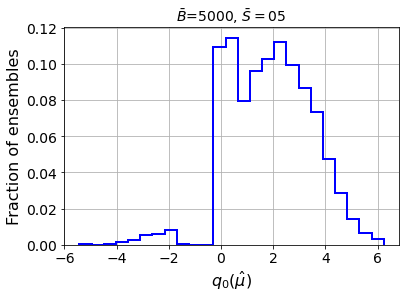

muhat mean:  0.15755728400252259
median q_muhat:  1.9058597436079996
Z_KDE:  1.3805287912999133
Z_KDE mu=0:  1.3805287912999133

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



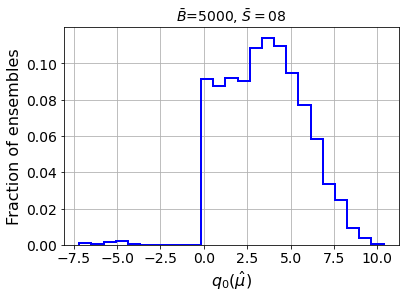

muhat mean:  0.12606684885431996
median q_muhat:  3.4731240358568645
Z_KDE:  1.8636319475306449
Z_KDE mu=0:  1.8636319475306449

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



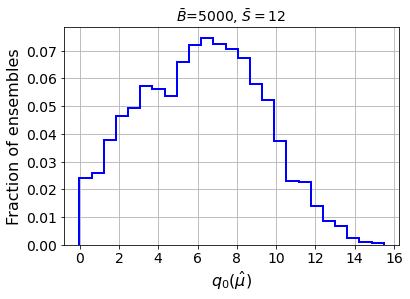

muhat mean:  0.09171746899306286
median q_muhat:  6.288477091405319
Z_KDE:  2.5076836107063665
Z_KDE mu=0:  2.5076836107063665

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



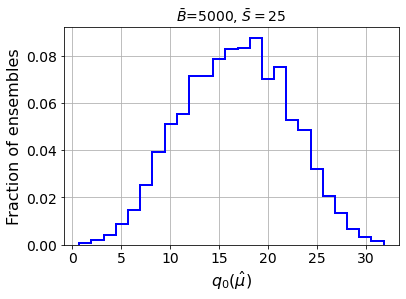

muhat mean:  0.05508100147275406
median q_muhat:  16.8029488534455
Z_KDE:  4.09914001388651
Z_KDE mu=0:  4.09914001388651

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



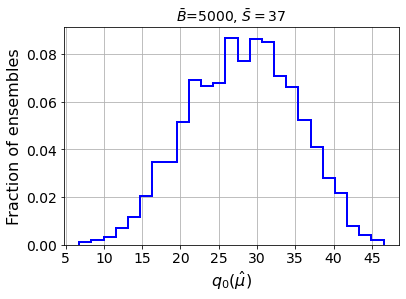

muhat mean:  0.04409597979372764
median q_muhat:  28.34453938155597
Z_KDE:  5.3239589951046735
Z_KDE mu=0:  5.3239589951046735

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



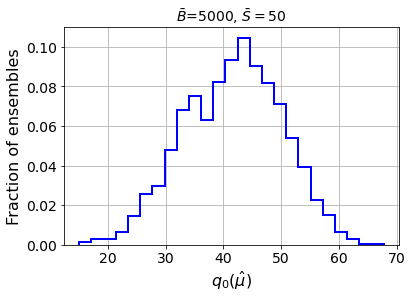

muhat mean:  0.0370214556163231
median q_muhat:  42.19780393626496
Z_KDE:  6.4959836773397885
Z_KDE mu=0:  6.4959836773397885

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



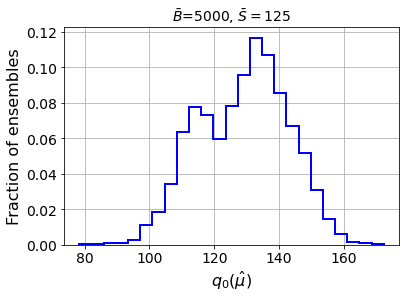

muhat mean:  0.031112984822934238
median q_muhat:  130.36163219974762
Z_KDE:  11.417601858522989
Z_KDE mu=0:  11.420124331636002

 ----------------------------------------- 



In [24]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [25]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.7518440975335097, 1.3805287912999133, 1.8636319475306449, 2.5076836107063665, 4.09914001388651, 5.3239589951046735, 6.4959836773397885, 11.417601858522989]
[0.7518440975335097, 1.3805287912999133, 1.8636319475306449, 2.5076836107063665, 4.09914001388651, 5.3239589951046735, 6.4959836773397885, 11.420124331636002]
[0.12031939483084682, 0.15755728400252259, 0.12606684885431996, 0.09171746899306286, 0.05508100147275406, 0.04409597979372764, 0.0370214556163231, 0.031112984822934238]


In [26]:
store_Z_MLL_KDE = [0.7518440975335097, 1.3805287912999133, 1.8636319475306449, 2.5076836107063665, 4.09914001388651, 5.3239589951046735, 6.4959836773397885, 11.417601858522989]
store_Z_MLL_KDE_mu0 = [0.7518440975335097, 1.3805287912999133, 1.8636319475306449, 2.5076836107063665, 4.09914001388651, 5.3239589951046735, 6.4959836773397885, 11.420124331636002]

store_muhat_mean_MLL = [0.12031939483084682, 0.15755728400252259, 0.12606684885431996, 0.09171746899306286, 0.05508100147275406, 0.04409597979372764, 0.0370214556163231, 0.031112984822934238]

##### For 1 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
 13133.91144752 13136.52686344 13135.20403141 13124.4465714
 13081.97430536 12953.30296263 12646.90063747 12076.43902568
 11202.23022486 10003.59890885  8464.85956098  6574.83244822
  4321.82087182  1732.90872029 -1152.70773846 -4367.37060073]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.0063479219593504735, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
 24490.37767141 23612.7899851  22362.99496585 20799.02746021
 19004.00175675 17035.79351484 14941.12325009 12747.87851851
 10476.94376434  8132.4771175   5708.08505781  3227.28539202
   704.20310275 -1908.90640279 -4350.15046761 -5791.88575004]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


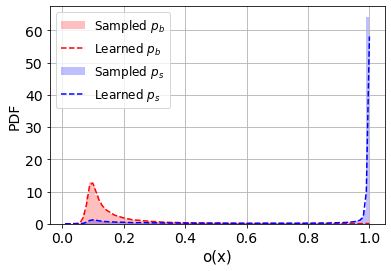


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.5956750737534531

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



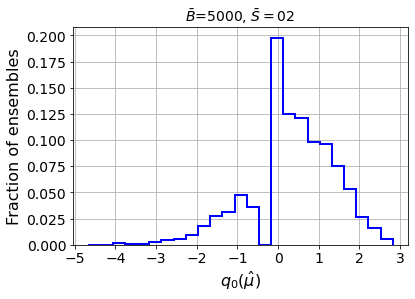

muhat mean:  0.19720529523009037
median q_muhat:  0.3987130965267056
Z_KDE:  0.6314373258896766
Z_KDE mu=0:  0.6314373258896766

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  1.322597321084388

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



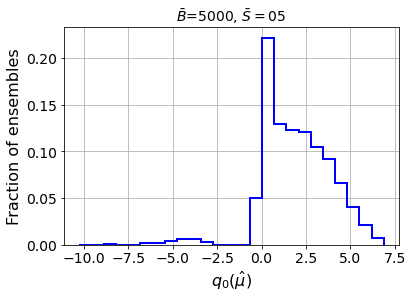

muhat mean:  0.23500105108261513
median q_muhat:  1.8151775742683345
Z_KDE:  1.3472852609111161
Z_KDE mu=0:  1.3472852609111161

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  1.9304026609114542

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



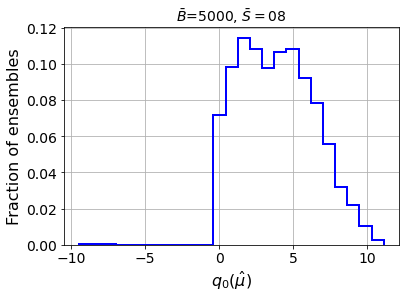

muhat mean:  0.17740172377548877
median q_muhat:  3.7918938266266817
Z_KDE:  1.9472785693440684
Z_KDE mu=0:  1.947420261895526

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  2.6262931975476675

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



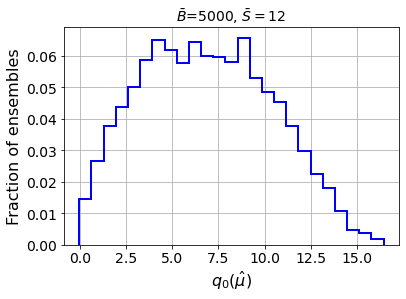

muhat mean:  0.13172167332352325
median q_muhat:  6.788927888995108
Z_KDE:  2.605557116816883
Z_KDE mu=0:  2.6080631782661117

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  4.401773842473256

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



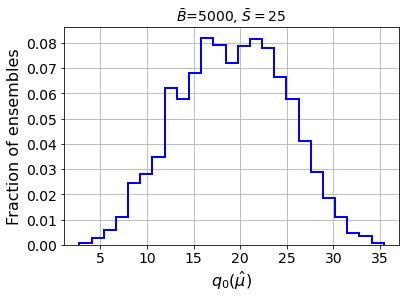

muhat mean:  0.07452135493372607
median q_muhat:  19.183250930131013
Z_KDE:  4.379868825676291
Z_KDE mu=0:  4.392423334131226

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  5.69247539720635

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



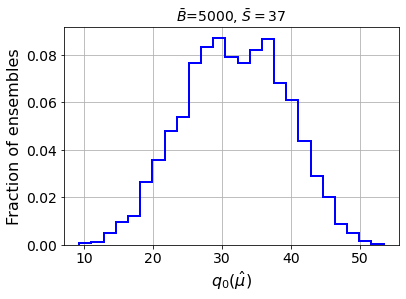

muhat mean:  0.06162913070932435
median q_muhat:  31.869795980059045
Z_KDE:  5.645334000753103
Z_KDE mu=0:  5.669016275167973

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  6.884880437799432

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



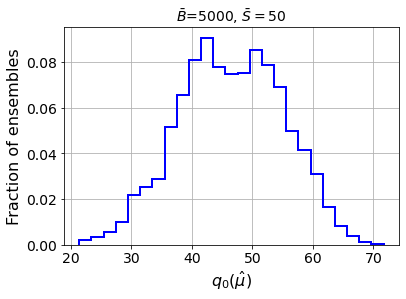

muhat mean:  0.05347076146403029
median q_muhat:  46.63218915035095
Z_KDE:  6.82877654857376
Z_KDE mu=0:  6.855906289610818

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  11.915545580559446

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



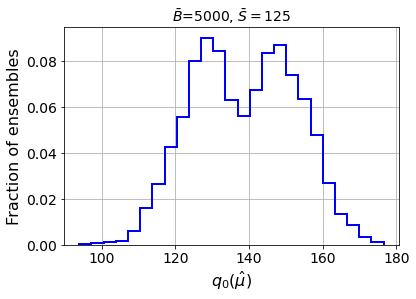

muhat mean:  0.04704890387858347
median q_muhat:  138.72244665007526
Z_KDE:  11.778049356751536
Z_KDE mu=0:  11.878580789629785

 ----------------------------------------- 



In [26]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
print(grid.best_estimator_)

SM_bandwidth_1ML = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
print(grid.best_estimator_)

NP_bandwidth_1ML = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [27]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.5956750737534531, 1.322597321084388, 1.9304026609114542, 2.6262931975476675, 4.401773842473256, 5.69247539720635, 6.884880437799432, 11.915545580559446]
[0.6314373258896766, 1.3472852609111161, 1.9472785693440684, 2.605557116816883, 4.379868825676291, 5.645334000753103, 6.82877654857376, 11.778049356751536]
[0.6314373258896766, 1.3472852609111161, 1.947420261895526, 2.6080631782661117, 4.392423334131226, 5.669016275167973, 6.855906289610818, 11.878580789629785]
[0.19720529523009037, 0.23500105108261513, 0.17740172377548877, 0.13172167332352325, 0.07452135493372607, 0.06162913070932435, 0.05347076146403029, 0.04704890387858347]


In [27]:
store_Z_KDE_bins = [0.5956750737534531, 1.322597321084388, 1.9304026609114542, 2.6262931975476675, 4.401773842473256, 5.69247539720635, 6.884880437799432, 11.915545580559446]

store_Z_MLL_KDE_1ML = [0.6314373258896766, 1.3472852609111161, 1.9472785693440684, 2.605557116816883, 4.379868825676291, 5.645334000753103, 6.82877654857376, 11.778049356751536]
store_Z_MLL_KDE_mu0_1ML = [0.6314373258896766, 1.3472852609111161, 1.947420261895526, 2.6080631782661117, 4.392423334131226, 5.669016275167973, 6.855906289610818, 11.878580789629785]

store_muhat_mean_MLL_1ML = [0.19720529523009037, 0.23500105108261513, 0.17740172377548877, 0.13172167332352325, 0.07452135493372607, 0.06162913070932435, 0.05347076146403029, 0.04704890387858347]

<ipython-input-11-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-11-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


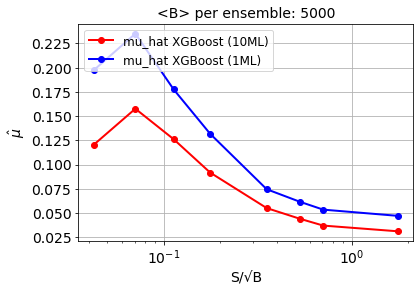

<ipython-input-11-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-11-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

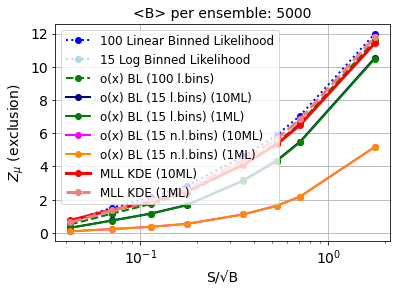

In [11]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [28]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [30]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.06284976324934091
WP:  0.5     S/B**0.5=  0.11141202826143448
WP:  0.75     S/B**0.5=  0.17986478943329584
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.15712432006369387
WP:  0.5     S/B**0.5=  0.27852981380005937
WP:  0.75     S/B**0.5=  0.4496614333965477
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.25139848940879533
WP:  0.5     S/B**0.5=  0.4456464691634645
WP:  0.75     S/B**0.5=  0.7194557004969203
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.3770968887033216
WP:  0.5     S/B**0.5=  0.6684672378429773
WP:  0.75     S/B**0.5=  1.0791783647252426
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  0.7856149954219098
WP:  0.5     S/B**0.5=  1.392629803754

In [29]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.06284976324934091, 0.15712432006369387, 0.25139848940879533, 0.3770968887033216, 0.7856149954219098, 1.1627134517702402, 1.5712299908438196, 3.9281796525957273]
SrootB_WP1_XG = [0.11141202826143448, 0.27852981380005937, 0.4456464691634645, 0.6684672378429773, 1.392629803754366, 2.0611016141241585, 2.785259607508732, 6.963273074383458]
SrootB_WP2_XG = [0.17986478943329584, 0.4496614333965477, 0.7194557004969203, 1.0791783647252426, 2.2482783339468946, 3.3274719228797762, 4.496556667893789, 11.241651100699176]

<ipython-input-14-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-14-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

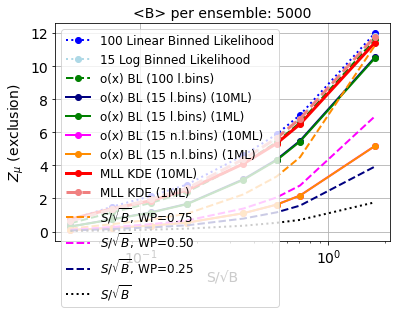

In [14]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-15-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


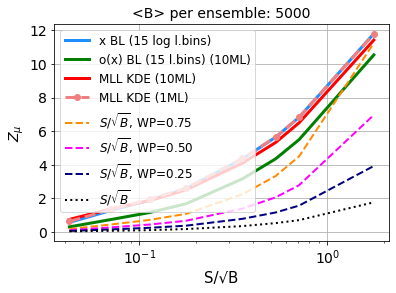

In [15]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

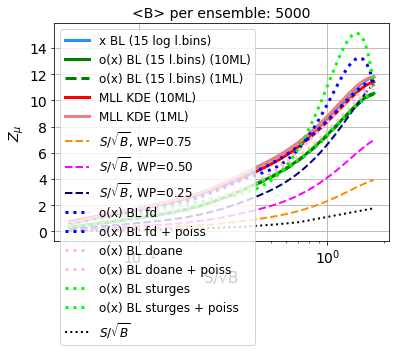

In [33]:
    
# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


fcubic_bins_XG_CV0 = interp1d(posX, Z_bins_XG_CV0, kind='cubic')
fcubic_bins_XG_CV0_chi2 = interp1d(posX, Z_bins_XG_CV0_chi2, kind='cubic')
fcubic_bins_XG_CV0_chi2_N = interp1d(posX, Z_bins_XG_CV0_chi2_N, kind='cubic')
fcubic_bins_XG_CV0_MSE = interp1d(posX, Z_bins_XG_CV0_MSE, kind='cubic')
fcubic_bins_XG_CV0_poiss = interp1d(posX, Z_bins_XG_CV0_poiss, kind='cubic')

fcubic_bins_XG_CV0_zeros = interp1d(posX, Z_bins_XG_CV0_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV0_MSE_zeros = interp1d(posX, Z_bins_XG_CV0_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV0_poiss_zeros = interp1d(posX, Z_bins_XG_CV0_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV1 = interp1d(posX, Z_bins_XG_CV1, kind='cubic')
fcubic_bins_XG_CV1_chi2 = interp1d(posX, Z_bins_XG_CV1_chi2, kind='cubic')
fcubic_bins_XG_CV1_chi2_N = interp1d(posX, Z_bins_XG_CV1_chi2_N, kind='cubic')
fcubic_bins_XG_CV1_MSE = interp1d(posX, Z_bins_XG_CV1_MSE, kind='cubic')
fcubic_bins_XG_CV1_poiss = interp1d(posX, Z_bins_XG_CV1_poiss, kind='cubic')

fcubic_bins_XG_CV1_zeros = interp1d(posX, Z_bins_XG_CV1_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV1_MSE_zeros = interp1d(posX, Z_bins_XG_CV1_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV1_poiss_zeros = interp1d(posX, Z_bins_XG_CV1_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV2 = interp1d(posX, Z_bins_XG_CV2, kind='cubic')
fcubic_bins_XG_CV2_chi2 = interp1d(posX, Z_bins_XG_CV2_chi2, kind='cubic')
fcubic_bins_XG_CV2_chi2_N = interp1d(posX, Z_bins_XG_CV2_chi2_N, kind='cubic')
fcubic_bins_XG_CV2_MSE = interp1d(posX, Z_bins_XG_CV2_MSE, kind='cubic')
fcubic_bins_XG_CV2_poiss = interp1d(posX, Z_bins_XG_CV2_poiss, kind='cubic')

fcubic_bins_XG_CV2_zeros = interp1d(posX, Z_bins_XG_CV2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV2_MSE_zeros = interp1d(posX, Z_bins_XG_CV2_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV2_poiss_zeros = interp1d(posX, Z_bins_XG_CV2_poiss_zeros, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(plotX, fcubic_bins_XG_CV0_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd')
plt.plot(plotX, fcubic_bins_XG_CV0_poiss_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd + poiss')
plt.plot(plotX, fcubic_bins_XG_CV1_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane')
plt.plot(plotX, fcubic_bins_XG_CV1_poiss_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane + poiss')
plt.plot(plotX, fcubic_bins_XG_CV2_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges')
plt.plot(plotX, fcubic_bins_XG_CV2_poiss_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges + poiss')
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [34]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [38]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3044
acceptance_SM = 0.25*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)

#bins_XG_CV0_95CL = solve(fcubic_bins_XG_CV0, 1.64)
bins_XG_CV0_95CL = 1.5*solve(fcubic_bins_XG_CV0_zeros, 1.64)
# bins_XG_CV0_chi2_95CL = solve(fcubic_bins_XG_CV0_chi2, 1.64)
bins_XG_CV0_chi2_95CL = 1.5*solve(fcubic_bins_XG_CV0_chi2_zeros, 1.64)
# bins_XG_CV0_chi2_N_95CL = solve(fcubic_bins_XG_CV0_chi2_N, 1.64)
bins_XG_CV0_chi2_N_95CL = 1.5*solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
# bins_XG_CV0_MSE_95CL = solve(fcubic_bins_XG_CV0_MSE, 1.64)
bins_XG_CV0_MSE_95CL = 1.5*solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
# bins_XG_CV0_poiss_95CL = solve(fcubic_bins_XG_CV0_poiss, 1.64)
bins_XG_CV0_poiss_95CL = 1.5*solve(fcubic_bins_XG_CV0_poiss_zeros, 1.64)

bins_XG_CV1_95CL = solve(fcubic_bins_XG_CV1, 1.64)
bins_XG_CV1_chi2_95CL = solve(fcubic_bins_XG_CV1_chi2, 1.64)
bins_XG_CV1_chi2_N_95CL = solve(fcubic_bins_XG_CV1_chi2_N, 1.64)
bins_XG_CV1_MSE_95CL = solve(fcubic_bins_XG_CV1_MSE, 1.64)
bins_XG_CV1_poiss_95CL = solve(fcubic_bins_XG_CV1_poiss, 1.64)

bins_XG_CV2_95CL = solve(fcubic_bins_XG_CV2, 1.64)
# bins_XG_CV2_chi2_95CL = solve(fcubic_bins_XG_CV2_chi2, 1.64)
bins_XG_CV2_chi2_95CL = 1.5*solve(fcubic_bins_XG_CV2_chi2_zeros, 1.64)
# bins_XG_CV2_chi2_N_95CL = solve(fcubic_bins_XG_CV2_chi2_N, 1.64)
bins_XG_CV2_chi2_N_95CL = 1.5* solve(fcubic_bins_XG_CV2_chi2_N_zeros, 1.64)
bins_XG_CV2_MSE_95CL = solve(fcubic_bins_XG_CV2_MSE, 1.64)
# bins_XG_CV2_poiss_95CL = solve(fcubic_bins_XG_CV2_poiss, 1.64)
bins_XG_CV2_poiss_95CL = solve(fcubic_bins_XG_CV2_poiss_zeros, 1.64)

bins_XG_CV0_zeros_95CL = solve(fcubic_bins_XG_CV0_zeros, 1.64)
bins_XG_CV0_chi2_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_zeros, 1.64)
bins_XG_CV0_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
bins_XG_CV0_MSE_zeros_95CL = solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
bins_XG_CV0_poiss_zeros_95CL = solve(fcubic_bins_XG_CV0_poiss_zeros, 1.64)

bins_XG_CV1_zeros_95CL = solve(fcubic_bins_XG_CV1_zeros, 1.64)
bins_XG_CV1_chi2_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_zeros, 1.64)
bins_XG_CV1_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_N_zeros, 1.64)
bins_XG_CV1_MSE_zeros_95CL = solve(fcubic_bins_XG_CV1_MSE_zeros, 1.64)
bins_XG_CV1_poiss_zeros_95CL = solve(fcubic_bins_XG_CV1_poiss_zeros, 1.64)

bins_XG_CV2_zeros_95CL = solve(fcubic_bins_XG_CV2_zeros, 1.64)
bins_XG_CV2_chi2_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_zeros, 1.64)
bins_XG_CV2_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_N_zeros, 1.64)
bins_XG_CV2_MSE_zeros_95CL = solve(fcubic_bins_XG_CV2_MSE_zeros, 1.64)
bins_XG_CV2_poiss_zeros_95CL = solve(fcubic_bins_XG_CV2_poiss_zeros, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.376202*2
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

S1_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_95CL ) / acceptance_Signal
S2_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_95CL ) / acceptance_Signal
S3_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_95CL ) / acceptance_Signal
S4_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_95CL ) / acceptance_Signal
S5_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_95CL ) / acceptance_Signal

S1_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_95CL ) / acceptance_Signal
S2_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_95CL ) / acceptance_Signal
S3_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_95CL ) / acceptance_Signal
S4_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_95CL ) / acceptance_Signal
S5_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_95CL ) / acceptance_Signal

S1_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_95CL ) / acceptance_Signal
S2_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_95CL ) / acceptance_Signal
S3_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_95CL ) / acceptance_Signal
S4_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_95CL ) / acceptance_Signal
S5_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_95CL ) / acceptance_Signal

S1_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_zeros_95CL ) / acceptance_Signal
S2_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_zeros_95CL ) / acceptance_Signal
S3_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_zeros_95CL ) / acceptance_Signal
S5_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_zeros_95CL ) / acceptance_Signal

S1_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_zeros_95CL ) / acceptance_Signal
S2_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_zeros_95CL ) / acceptance_Signal
S3_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_zeros_95CL ) / acceptance_Signal
S5_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_zeros_95CL ) / acceptance_Signal

S1_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_zeros_95CL ) / acceptance_Signal
S2_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_zeros_95CL ) / acceptance_Signal
S3_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_zeros_95CL ) / acceptance_Signal
S5_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_zeros_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000

cross_BL_CV0_95CL = S1_CV0 / 3000000
cross_BL_CV0_chi2_95CL = S2_CV0 / 3000000
cross_BL_CV0_chi2_N_95CL = S3_CV0 / 3000000
cross_BL_CV0_MSE_95CL = S4_CV0 / 3000000
cross_BL_CV0_poiss_95CL = S5_CV0 / 3000000

cross_BL_CV1_95CL = S1_CV1 / 3000000
cross_BL_CV1_chi2_95CL = S2_CV1 / 3000000
cross_BL_CV1_chi2_N_95CL = S3_CV1 / 3000000
cross_BL_CV1_MSE_95CL = S4_CV1 / 3000000
cross_BL_CV1_poiss_95CL = S5_CV1 / 3000000

cross_BL_CV2_95CL = S1_CV2 / 3000000
cross_BL_CV2_chi2_95CL = S2_CV2 / 3000000
cross_BL_CV2_chi2_N_95CL = S3_CV2 / 3000000
cross_BL_CV2_MSE_95CL = S4_CV2 / 3000000
cross_BL_CV2_poiss_95CL = S5_CV2 / 3000000

cross_BL_CV0_zeros_95CL = S1_CV0_zeros / 3000000
cross_BL_CV0_chi2_zeros_95CL = S2_CV0_zeros / 3000000
cross_BL_CV0_chi2_N_zeros_95CL = S3_CV0_zeros / 3000000
cross_BL_CV0_MSE_zeros_95CL = S4_CV0_zeros / 3000000
cross_BL_CV0_poiss_zeros_95CL = S5_CV0_zeros / 3000000

cross_BL_CV1_zeros_95CL = S1_CV1_zeros / 3000000
cross_BL_CV1_chi2_zeros_95CL = S2_CV1_zeros / 3000000
cross_BL_CV1_chi2_N_zeros_95CL = S3_CV1_zeros / 3000000
cross_BL_CV1_MSE_zeros_95CL = S4_CV1_zeros / 3000000
cross_BL_CV1_poiss_zeros_95CL = S5_CV1_zeros / 3000000

cross_BL_CV2_zeros_95CL = S1_CV2_zeros / 3000000
cross_BL_CV2_chi2_zeros_95CL = S2_CV2_zeros / 3000000
cross_BL_CV2_chi2_N_zeros_95CL = S3_CV2_zeros / 3000000
cross_BL_CV2_MSE_zeros_95CL = S4_CV2_zeros / 3000000
cross_BL_CV2_poiss_zeros_95CL = S5_CV2_zeros / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)
print('')
print(bins_XG_CV0_95CL, S1_CV0 , cross_BL_CV0_95CL)
print(bins_XG_CV0_chi2_95CL, S2_CV0 , cross_BL_CV0_chi2_95CL)
print(bins_XG_CV0_chi2_N_95CL, S3_CV0 , cross_BL_CV0_chi2_N_95CL)
print(bins_XG_CV0_MSE_95CL, S4_CV0 , cross_BL_CV0_MSE_95CL)
print(bins_XG_CV0_poiss_95CL, S5_CV0 , cross_BL_CV0_poiss_95CL)
print('')
print(bins_XG_CV1_95CL, S1_CV1 , cross_BL_CV1_95CL)
print(bins_XG_CV1_chi2_95CL, S2_CV1 , cross_BL_CV1_chi2_95CL)
print(bins_XG_CV1_chi2_N_95CL, S3_CV1 , cross_BL_CV1_chi2_N_95CL)
print(bins_XG_CV1_MSE_95CL, S4_CV1 , cross_BL_CV1_MSE_95CL)
print(bins_XG_CV1_poiss_95CL, S5_CV1 , cross_BL_CV1_poiss_95CL)
print('')
print(bins_XG_CV2_95CL, S1_CV2 , cross_BL_CV2_95CL)
print(bins_XG_CV2_chi2_95CL, S2_CV2 , cross_BL_CV2_chi2_95CL)
print(bins_XG_CV2_chi2_N_95CL, S3_CV2 , cross_BL_CV2_chi2_N_95CL)
print(bins_XG_CV2_MSE_95CL, S4_CV2 , cross_BL_CV2_MSE_95CL)
print(bins_XG_CV2_poiss_95CL, S5_CV2 , cross_BL_CV2_poiss_95CL)
print('')
print(bins_XG_CV0_zeros_95CL, S1_CV0_zeros , cross_BL_CV0_zeros_95CL)
print(bins_XG_CV0_chi2_zeros_95CL, S2_CV0_zeros , cross_BL_CV0_chi2_zeros_95CL)
print(bins_XG_CV0_chi2_N_zeros_95CL, S3_CV0_zeros , cross_BL_CV0_chi2_N_zeros_95CL)
print(bins_XG_CV0_MSE_zeros_95CL, S4_CV0_zeros , cross_BL_CV0_MSE_zeros_95CL)
print(bins_XG_CV0_poiss_zeros_95CL, S5_CV0_zeros , cross_BL_CV0_poiss_zeros_95CL)
print('')
print(bins_XG_CV1_zeros_95CL, S1_CV1_zeros , cross_BL_CV1_zeros_95CL)
print(bins_XG_CV1_chi2_zeros_95CL, S2_CV1_zeros , cross_BL_CV1_chi2_zeros_95CL)
print(bins_XG_CV1_chi2_N_zeros_95CL, S3_CV1_zeros , cross_BL_CV1_chi2_N_zeros_95CL)
print(bins_XG_CV1_MSE_zeros_95CL, S4_CV1_zeros , cross_BL_CV1_MSE_zeros_95CL)
print(bins_XG_CV1_poiss_zeros_95CL, S5_CV1_zeros , cross_BL_CV1_poiss_zeros_95CL)
print('')
print(bins_XG_CV2_zeros_95CL, S1_CV2_zeros , cross_BL_CV2_zeros_95CL)
print(bins_XG_CV2_chi2_zeros_95CL, S2_CV2_zeros , cross_BL_CV2_chi2_zeros_95CL)
print(bins_XG_CV2_chi2_N_zeros_95CL, S3_CV2_zeros , cross_BL_CV2_chi2_N_zeros_95CL)
print(bins_XG_CV2_MSE_zeros_95CL, S4_CV2_zeros , cross_BL_CV2_MSE_zeros_95CL)
print(bins_XG_CV2_poiss_zeros_95CL, S5_CV2_zeros , cross_BL_CV2_poiss_zeros_95CL)



np.savetxt('saved-models/results5500GeV-ee.txt', [cross_bins_logbins_95CL,
                                                  cross_bins_XG_15bins_95CL,
                                                  cross_XG_MLL_95CL,
                                                  cross_bins_XG_15bins_1ML_95CL,
                                                  cross_XG_MLL_1ML_95CL,
                                                  cross_BL_CV0_95CL,
                                                  cross_BL_CV0_chi2_95CL,
                                                  cross_BL_CV0_chi2_N_95CL,
                                                  cross_BL_CV0_MSE_95CL,
                                                  cross_BL_CV0_poiss_95CL,
                                                  cross_BL_CV1_95CL,
                                                  cross_BL_CV1_chi2_95CL,
                                                  cross_BL_CV1_chi2_N_95CL,
                                                  cross_BL_CV1_MSE_95CL,
                                                  cross_BL_CV1_poiss_95CL,
                                                  cross_BL_CV2_95CL,
                                                  cross_BL_CV2_chi2_95CL,
                                                  cross_BL_CV2_chi2_N_95CL,
                                                  cross_BL_CV2_MSE_95CL,
                                                  cross_BL_CV2_poiss_95CL,
                                                  cross_BL_CV0_zeros_95CL,
                                                  cross_BL_CV0_chi2_zeros_95CL,
                                                  cross_BL_CV0_chi2_N_zeros_95CL,
                                                  cross_BL_CV0_MSE_zeros_95CL,
                                                  cross_BL_CV0_poiss_zeros_95CL,
                                                  cross_BL_CV1_zeros_95CL,
                                                  cross_BL_CV1_chi2_zeros_95CL,
                                                  cross_BL_CV1_chi2_N_zeros_95CL,
                                                  cross_BL_CV1_MSE_zeros_95CL,
                                                  cross_BL_CV1_poiss_zeros_95CL,
                                                  cross_BL_CV2_zeros_95CL,
                                                  cross_BL_CV2_chi2_zeros_95CL,
                                                  cross_BL_CV2_chi2_N_zeros_95CL,
                                                  cross_BL_CV2_MSE_zeros_95CL,
                                                  cross_BL_CV2_poiss_zeros_95CL])


correct_factor:  0.27396000000000004

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
0.09266547559545238 4.558221699574238 1.5194072331914128e-06
0.17232020961751565 8.476444044628513 2.8254813482095043e-06
0.09034244881701096 4.443951837987262 1.4813172793290873e-06
0.17510029643848754 8.613196724012337 2.8710655746707787e-06
0.08825264678806596 4.341154319332764 1.4470514397775881e-06

0.1616384692954119 7.951008436463136 2.650336145487712e-06
0.17082517307776107 8.402903085027589 2.8009676950091964e-06
0.18231254081390358 8.96796756615613 2.989322522052043e-06
0.18231254081390358 8.96796756615613 2.989322522052043e-06
0.1712888102109276 8.425709430406469 2.8085698101354898e-06

0.15716187288878405 7.730804323228881 2.576934774409627e-06
0.1274363586384677 6.268604046198794 2.0895346820662645e-06
0.1274363586384677 6.268604046198794 2.0895346820662645e-06
0.14634864207168788 7.19890068774577 2.3996335625819233e-06
0.127436358638